In [1]:
from math import log10 as log
from re import split
from glob import glob
import scipy.optimize as spopt
from scipy.optimize import fmin
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import join as opj
from natsort import realsorted as rst
from matplotlib.ticker import FormatStrFormatter
import ptitprince as pt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
#Usefull functions
def contrastNoiseRatio(dataList, preStim, onStim):
    meanBL = np.mean(dataList[0:preStim], axis=0)
    meanSTIM = np.mean(dataList[preStim:(preStim+onStim)], axis=0)
    return (meanSTIM - meanBL)/np.std(dataList[0:preStim])

def linearFit(L, y):
    x = np.linspace(0, len(y), num = len(y))
    if L == '_l1':
        # find L1 line fit
        l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
        X1 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y))
        print(X1)
        return X1[0]*x + X1[1]
    elif L == '_l2':
        # find L2 line fit
        l2_fit = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
        X2 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y))
        print(X2)
        return X2[0]*x + X2[1]
    else:
        print('No value for method provided')
        
def plotHalfViolin(dataToPlot, lgnd, groupedBy):
    
    plt.rcParams['figure.figsize'] = [30, 16]
    plt.rcParams.update({'font.size': 30})
    
    grp_by = groupedBy
    
    R = r'$\overline ' + '{' + f'{lgnd}' + '}' + '$ = '
    
    fig, ax = plt.subplots()

    ort="v"; pal = sns.color_palette("Set2", 4)
    
    if session == 'N_ROIs':
        if grp_by:
            plt.title(f'{lgnd} of {grp_by} trials average: ' + f' mouse-{subject},' + ' negative BOLD')
        else:
            plt.title(f'{lgnd}: ' + f' mouse-{subject},' + ' negative BOLD')
    else:
        if grp_by:
            plt.title(f'{lgnd} of {grp_by} trials average: ' + f' mouse-{subject},' + ' positive BOLD')
        else:
            plt.title(f'{lgnd}: ' + f' mouse-{subject},' + ' positive BOLD')
    
    plt.ylabel(lgnd)

    ax=pt.half_violinplot(data = dataToPlot, bw = .2, palette = pal, cut=True,
                          scale = "area", width = .6, inner = None, orient=ort)

    if len(ROIs) == 3:
        plt.legend ((R + f'{round(np.mean(dataToPlot)[0],2)}', 
                     R + f'{round(np.mean(dataToPlot)[1],2)}', 
                     R + f'{round(np.mean(dataToPlot)[2],2)}'),
                       loc='upper center', bbox_to_anchor=(0.5, 1.00),
                          ncol=3, fancybox=True)
    if len(ROIs) == 4:
        plt.legend ((R + f'{round(np.mean(dataToPlot)[0],2)}', 
                     R + f'{round(np.mean(dataToPlot)[1],2)}', 
                     R + f'{round(np.mean(dataToPlot)[2],2)}',
                     R + f'{round(np.mean(dataToPlot)[3],2)}'),  
                     loc='upper center', bbox_to_anchor=(0.5, 1.00),
                          ncol=4, fancybox=True)
    
    if np.min(np.min(dataToPlot))>1 :
        ax.set_ylim(np.min(np.min(dataToPlot))*.75, np.max(np.max(dataToPlot))*1.15)
    else:
        ax.set_ylim(np.min(np.min(dataToPlot))-0.5, np.max(np.max(dataToPlot))+1.0)

    ax=sns.stripplot(data = dataToPlot, palette = pal, edgecolor = "gray",
                     size = 20, jitter = 0.06, zorder = 0, orient=ort)
    ax=sns.boxplot(data = dataToPlot, color = "black", width = .15, zorder = 10,\
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
                showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
                   saturation = 1, orient=ort)
    return fig, ax

def plotBar(dataToPlot, lgnd, groupedBy):
    
    plt.rcParams['figure.figsize'] = [30, 16]
    plt.rcParams.update({'font.size': 30})
        
    grp_by = groupedBy
    
    R = r'$\overline ' + '{' + f'{lgnd}' + '}' + '$ = '
    
    fig, ax = plt.subplots()
            
    pal = sns.color_palette("Set2", 4)
    
    if session == 'N_ROIs':
        if grp_by:
            plt.title(f'{lgnd} of {grp_by} trials average: ' + f' mouse-{subject},' + ' negative BOLD')
        else:
            plt.title(f'{lgnd}: ' + f' mouse-{subject},' + ' negative BOLD')
    else:
        if grp_by:
            plt.title(f'{lgnd} of {grp_by} trials average: ' + f' mouse-{subject},' + ' positive BOLD')
        else:
            plt.title(f'{lgnd}: ' + f' mouse-{subject},' + ' positive BOLD')
    
    plt.ylabel(lgnd)
    
    
    ax = sns.swarmplot(data=dataToPlot, palette=pal, edgecolor="black", size=20)
    
    if len(ROIs) == 3:
        plt.legend ((R + f'{round(np.mean(dataToPlot)[0],2)}', 
                     R + f'{round(np.mean(dataToPlot)[1],2)}', 
                     R + f'{round(np.mean(dataToPlot)[2],2)}'),
                       loc='upper center', bbox_to_anchor=(0.5, 1.00),
                          ncol=3, fancybox=True)
    if len(ROIs) == 4:
        plt.legend ((R + f'{round(np.mean(dataToPlot)[0],2)}', 
                     R + f'{round(np.mean(dataToPlot)[1],2)}', 
                     R + f'{round(np.mean(dataToPlot)[2],2)}',
                     R + f'{round(np.mean(dataToPlot)[3],2)}'),  
                     loc='upper center', bbox_to_anchor=(0.5, 1.00),
                          ncol=4, fancybox=True)
    
    if np.min(np.min(dataToPlot))>1 :
        ax.set_ylim(np.min(np.min(dataToPlot))*.75, np.max(np.max(dataToPlot))*1.15)
    else:
        ax.set_ylim(np.min(np.min(dataToPlot))-0.5, np.max(np.max(dataToPlot))+1.0)
        
    ax = sns.boxplot(data = dataToPlot, color = "black", width = .5, zorder = 10,\
                showcaps = True, boxprops = {'linewidth':1,'facecolor':'none', "zorder":10},\
                showfliers=True, whiskerprops = {'linewidth':1, "zorder":10})
    
    
    return fig, ax


In [3]:
#GLOBAL CONSTs
savefigs = True
preStim = 40
onStim = 20

In [4]:
base_dir = '/home/brainy/Documents/15tdata/Processing/ROIs'
os.chdir(base_dir)


In [5]:
#Get SUBJECT name
subj = rst(os.listdir(base_dir))
print('Subjects in the list {} '.format(subj))

Subjects in the list ['M1', 'M2', 'M3'] 


In [6]:
#Get SESSIONS name
ses = {}
for subject in subj:
    ses[subject] = rst(os.listdir(opj(base_dir, subject)))
    print(' Subject {} : {} '.format(subject, ses[subject]))

 Subject M1 : ['N_ROIs', 'P_ROIs', 'PbN_ROIs', 'Processed', 'QA_NEG', 'QA_POS'] 
 Subject M2 : ['N_ROIs', 'P_ROIs', 'PbN_ROIs', 'Processed', 'QA_NEG', 'QA_POS'] 
 Subject M3 : ['N_ROIs', 'P_ROIs', 'PbN_ROIs', 'Processed', 'QA_NEG', 'QA_POS'] 


In [7]:
#Get FILES in SUBJECT with specified SESSION 
subject = subj[0]
session = ses[subject][0]
work_dir = opj(base_dir, subject, session)
print(f'subj - {subject}, \nsession - {session}, \nfiles = {len(os.listdir(work_dir))}')

subj - M1, 
session - N_ROIs, 
files = 145


In [8]:
#Save figs
savefigs = True
figs_dir = opj(work_dir + '/FIG')

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir(figs_dir):
        os.makedirs(figs_dir)
        
def saveFig(figName):
    path = opj(figs_dir + '/' + figName)
    plt.savefig(path, bbox_inches='tight')

In [9]:
slices = rst([k for k in os.listdir(opj(base_dir, subject, 'QA_NEG'))])

In [10]:
fileNames = [f for f in os.listdir(opj(base_dir, subject, session)) if f.endswith('.txt')]

ROIs = [str.split(name, '_')[0] for name in fileNames]
ROIs = rst(list(dict.fromkeys(ROIs)))

print(f'Regions of interest - {ROIs}')
#roi_slice = [str.split(name, '_')[1] for name in fileNames]

Regions of interest - ['barrFieldAud-L', 'barrelField-L', 'barrelField-R']


In [11]:
filesDict = {}
for ROI in ROIs:
    filesDict[ROI] = rst(glob(opj(base_dir, subject, session + '/' + '*' + ROI + '*.txt')))
    
cornerFilesDict = {} 
for sliceNum in slices:
    cornerFilesDict[sliceNum] = rst(glob(opj(base_dir, subject, 'QA_NEG', sliceNum  + '/' + '*.txt')))

In [12]:
cnr = {}
dataDict = {}
meanBL = {}
meanStim = {}
tsnr = {}
for ROI in ROIs:
    #Raw data
    dataDict[ROI] = [np.loadtxt(k) for k in filesDict[ROI]]
    #CNR of each trial each ROI
    cnr[ROI] = [contrastNoiseRatio(np.loadtxt(k), preStim, onStim) for k in filesDict[ROI]]
  #  cnr[ROI+'_maxProb'] = fmin(np.array(cnr[ROI]), np.mean(cnr[ROI]))
    #Mean of base line
    meanBL[ROI] = [np.mean(np.loadtxt(k)[0:preStim]) for k in filesDict[ROI]]
    #Standard deviation of base line
    meanBL[ROI+'_std'] = [np.std(np.loadtxt(k)[0:preStim]) for k in filesDict[ROI]]
    #Temporal SNR
    tsnr[ROI] = [np.mean(np.loadtxt(k)[0:preStim])/np.std(np.loadtxt(k)[0:preStim]) for k in filesDict[ROI]]
    print(f'tSNR from {ROI} : {tsnr[ROI]}')
    #Mean of on stim period
    meanStim[ROI] = [np.mean(np.loadtxt(k)[preStim:preStim+onStim]) for k in filesDict[ROI]]
    #----------------------Approximation of standard deviatio-------------------------------
        
    fitNorm = ['_l1', '_l2']
           
    for norm in fitNorm:
        X = linearFit(norm, meanBL[ROI+'_std'])     
        meanBL[ROI+norm] = X

tSNR from barrFieldAud-L : [120.33332890778668, 120.2459541111246, 114.05276465702705, 140.8095649194139, 115.5768635152518, 114.50685105980772, 120.04433295076092, 109.59740953389064, 112.62072532965777, 141.5500076023057, 106.66038515499525, 112.08396073883861, 121.96084298469442, 114.32323802213365, 138.21088862348924, 146.6949110831842, 141.6429480549405, 107.12674618056407, 114.22883642872057, 130.6155222640425, 120.29212064764577, 110.95259903785269, 112.18314488900532, 113.51179105856538, 98.5592527301482, 144.9191740800264, 121.55802256648126, 111.94193394320219, 104.94081926279023, 94.5992376414056, 100.81335147203175, 102.60800763981022, 123.20108437201746, 106.04061669074568, 118.95520142251227, 127.1749632688967, 92.23337802064084, 151.61851264727275, 112.14978171058708, 86.92303439929701, 80.45497873413824, 101.25455456535386, 97.24943369103103, 109.89404788299615, 84.43930045695666, 108.71751205432463, 100.53753433211254]
Optimization terminated successfully.
         Cur

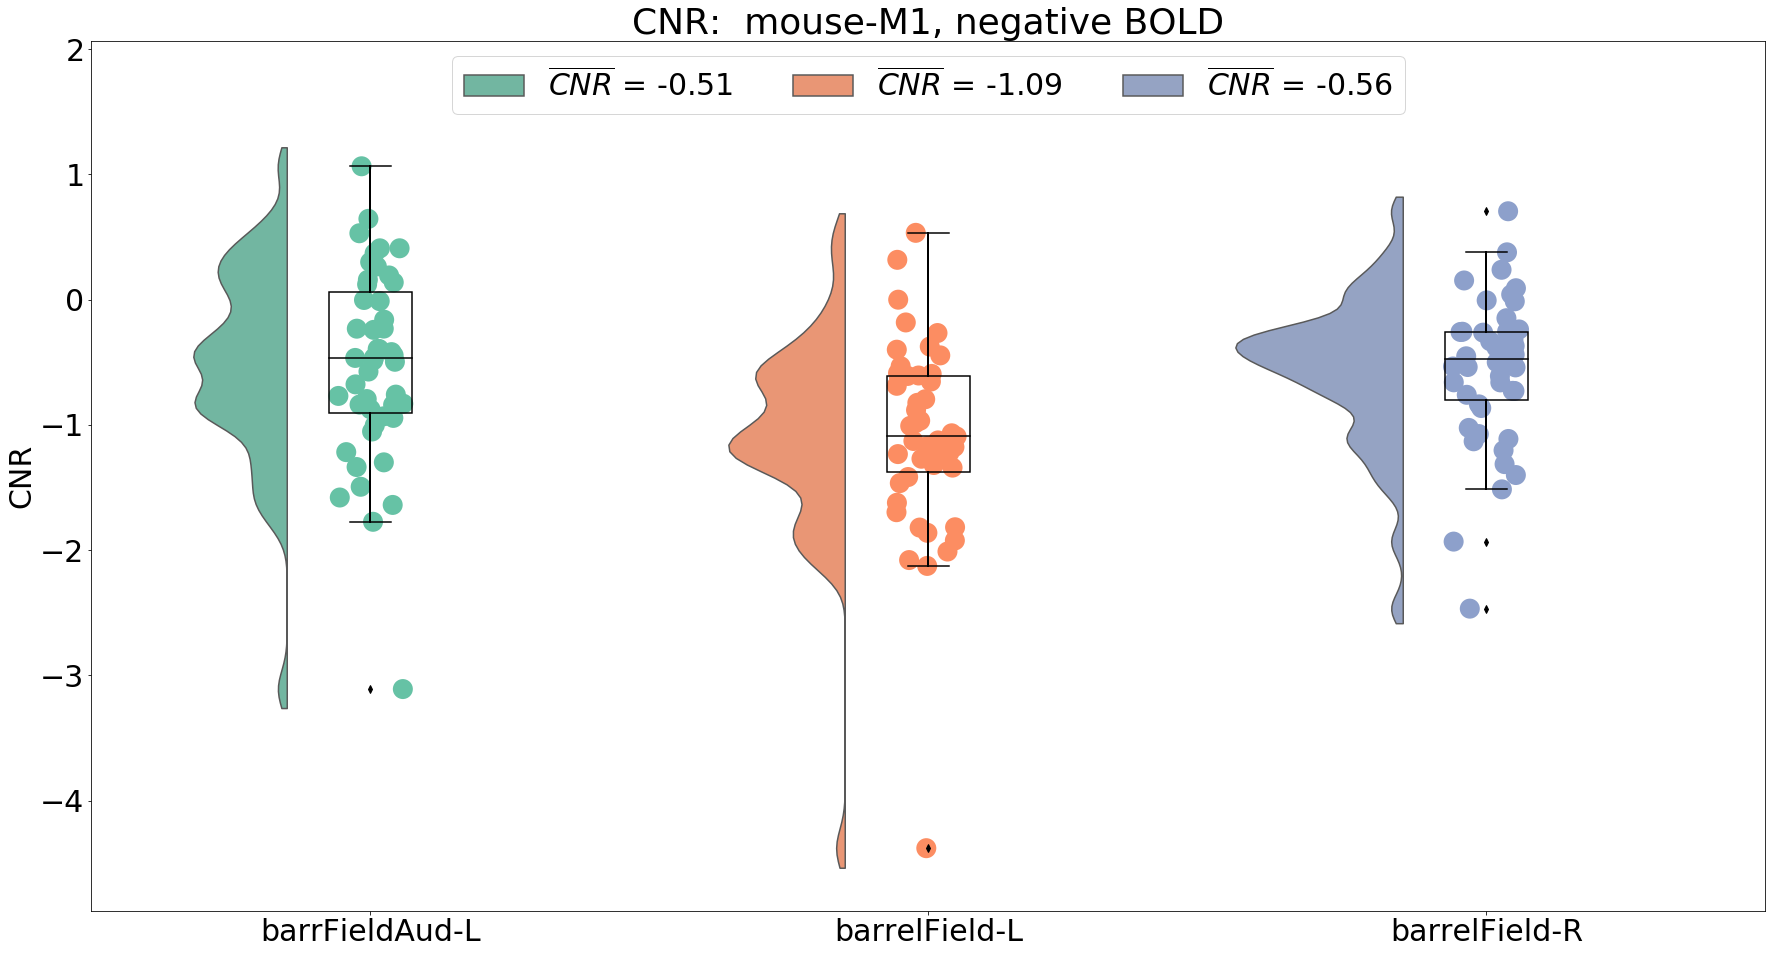

In [13]:
#CNR data for each single trial and ROI
dataCNR = pd.DataFrame.from_dict(cnr)

fig, ax = plotHalfViolin(dataCNR, 'CNR', False)

if savefigs:
    saveFig('CNR_' + f' mouse-{subject}_' + 'NBR' + '.svg')

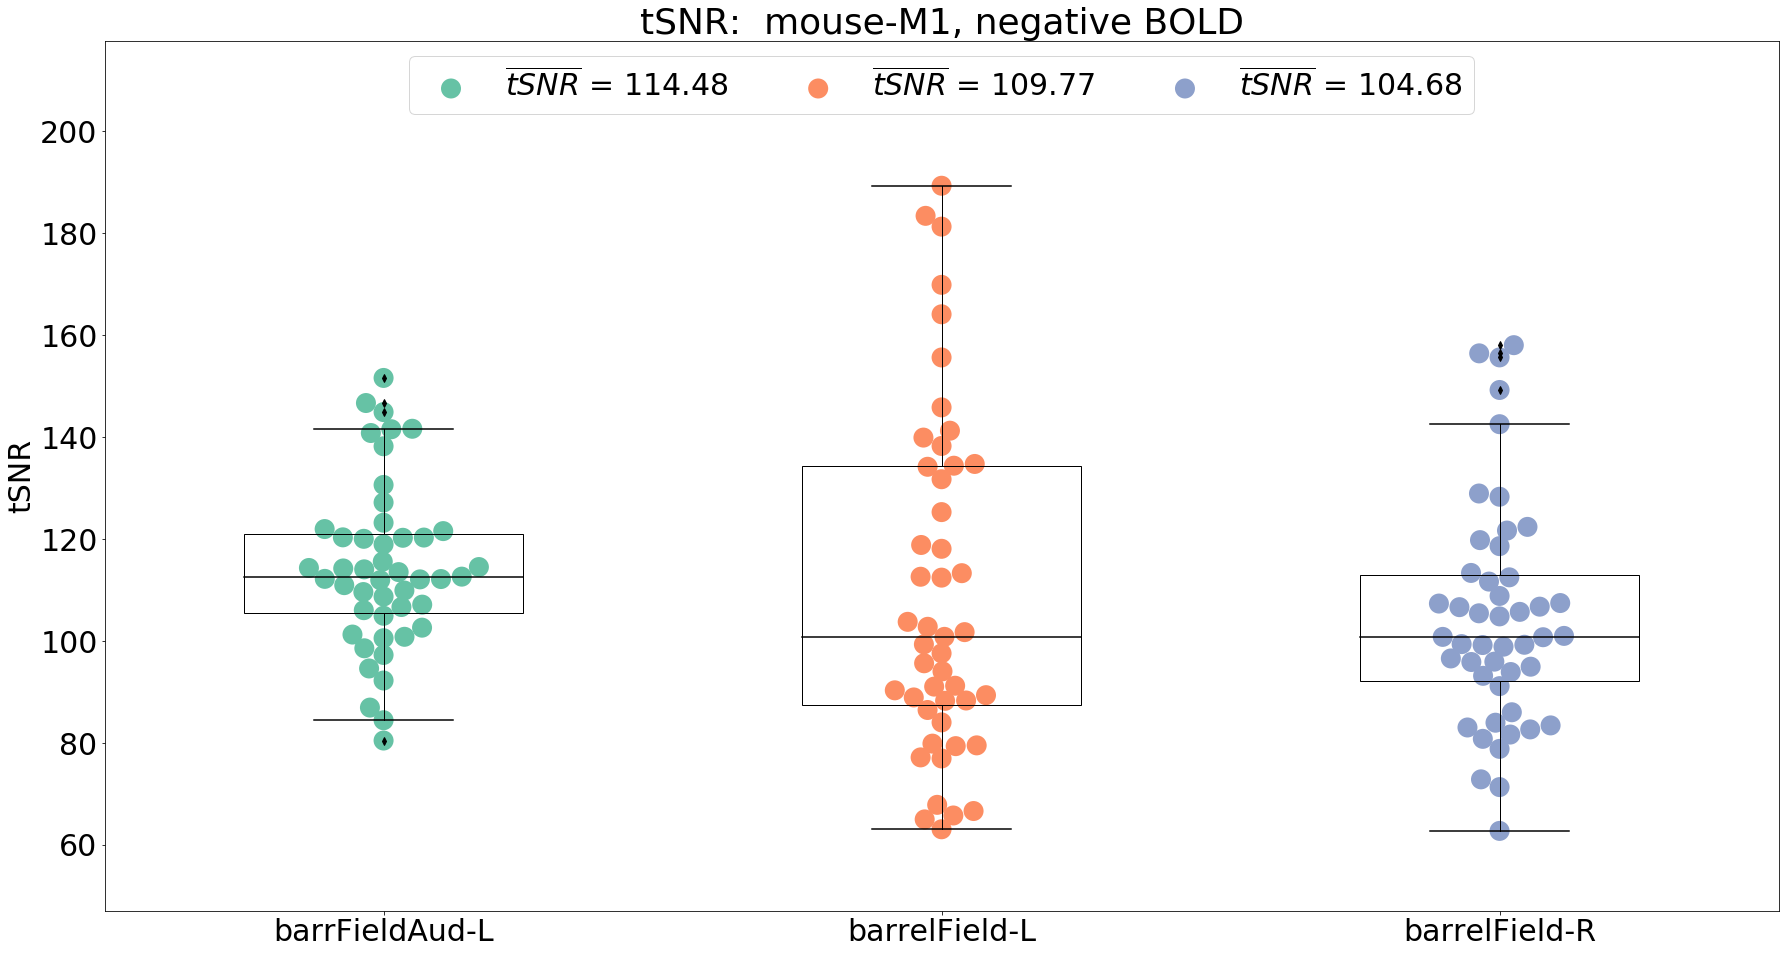

In [14]:
#CNR data for each single trial and ROI
dataTSNR = pd.DataFrame.from_dict(tsnr)

fig, ax = plotBar(dataTSNR, 'tSNR', False)

if savefigs:
    saveFig('tSNR_BAR_' + f' mouse-{subject}_' + 'NBR' + '.svg')

In [15]:
cornerDict = {}
cornMean = {}

for sliceNum in slices:
    #Raw data from corners
    cornerDict[sliceNum] = [np.loadtxt(k) for k in cornerFilesDict[sliceNum]]
    #Mean signal from 4 corners 
    cornMean[sliceNum] = [np.mean((np.loadtxt(k)[:, 0:preStim]) ,axis=0) for k in cornerFilesDict[sliceNum]]
    #Standard deviation of mean
    cornMean[sliceNum+'_std'] = [np.std((np.loadtxt(k)[:, 0:preStim]) ,axis=0) for k in cornerFilesDict[sliceNum]]
    
cornerDict.keys()

dict_keys(['slice0', 'slice1', 'slice2', 'slice3', 'slice4', 'slice5', 'slice6', 'slice7', 'slice8'])

In [16]:
len(ROIs)

3

In [17]:
#----------------------------------------------PLOTTING AREA---------------------------------------------------

In [18]:
# X for baseLine
x_BL = np.linspace(0, len(meanBL[ROI]), num = len(meanBL[ROI]))
# X for time Course
x_main = np.linspace(0, np.shape(dataDict[ROIs[0]])[1], 
                     num = np.shape(dataDict[ROIs[0]])[1])

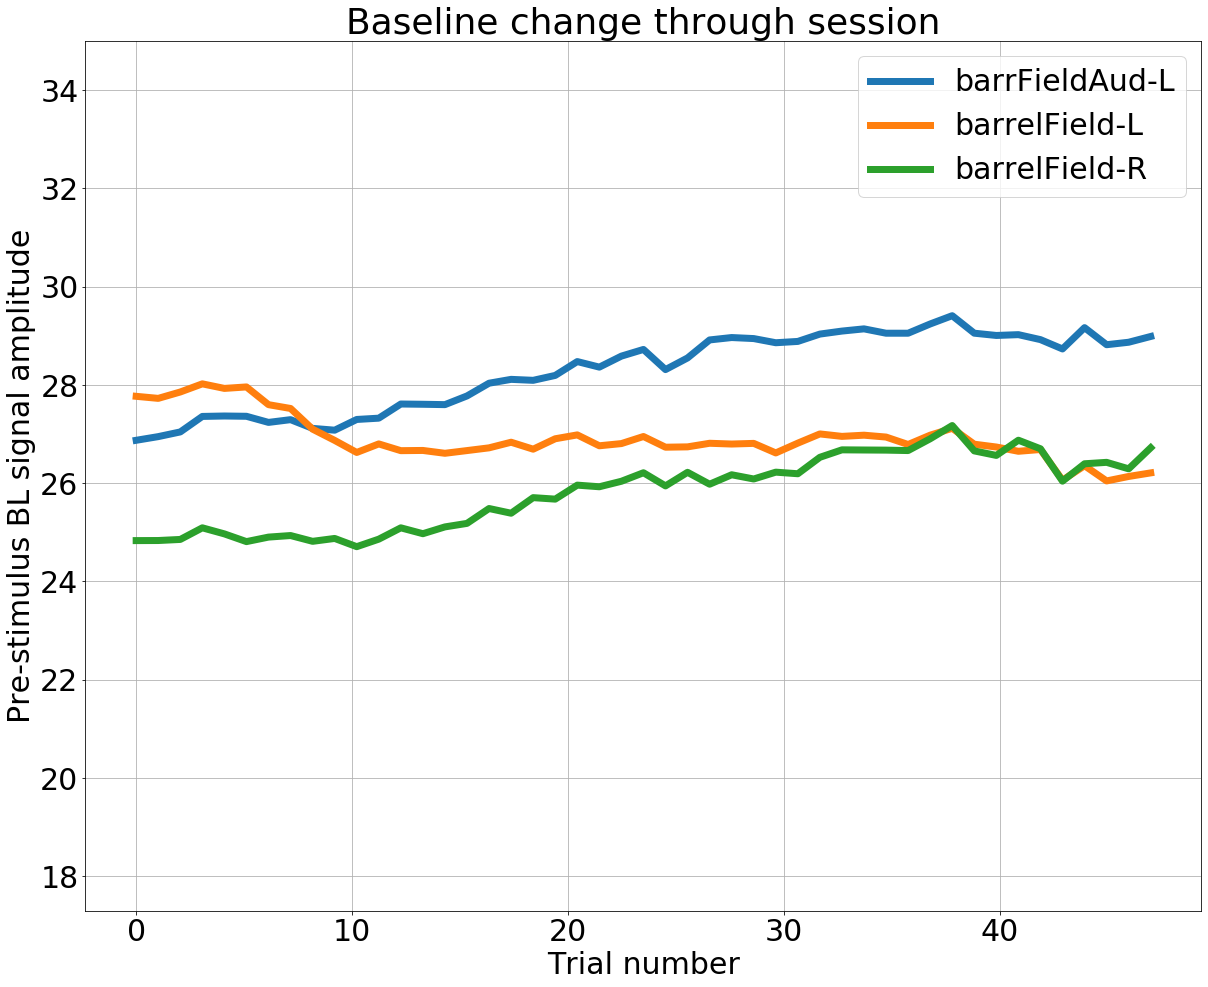

In [19]:
plt.rcParams['figure.figsize'] = [20, 16]
plt.rcParams.update({'font.size': 30})

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))

plt.title('Baseline change through session')
plt.xlabel('Trial number')
plt.ylabel('Pre-stimulus BL signal amplitude')
plt.grid()
m = [2]

for ROI in ROIs:
    minimum = np.min(meanBL[ROI])
    fig =  plt.plot(x_BL, meanBL[ROI], '-', linewidth=7, label=f'{ROI}')
    if minimum < m:
        m = minimum

ax.set_ylim([minimum*0.7, 35])

plt.legend()        

if savefigs:
    saveFig('ROI_BL_Change_' + f' mouse-{subject}_' + f'{session}' + '.svg')

plt.show()

In [20]:
dataDict.keys()

dict_keys(['barrFieldAud-L', 'barrelField-L', 'barrelField-R'])

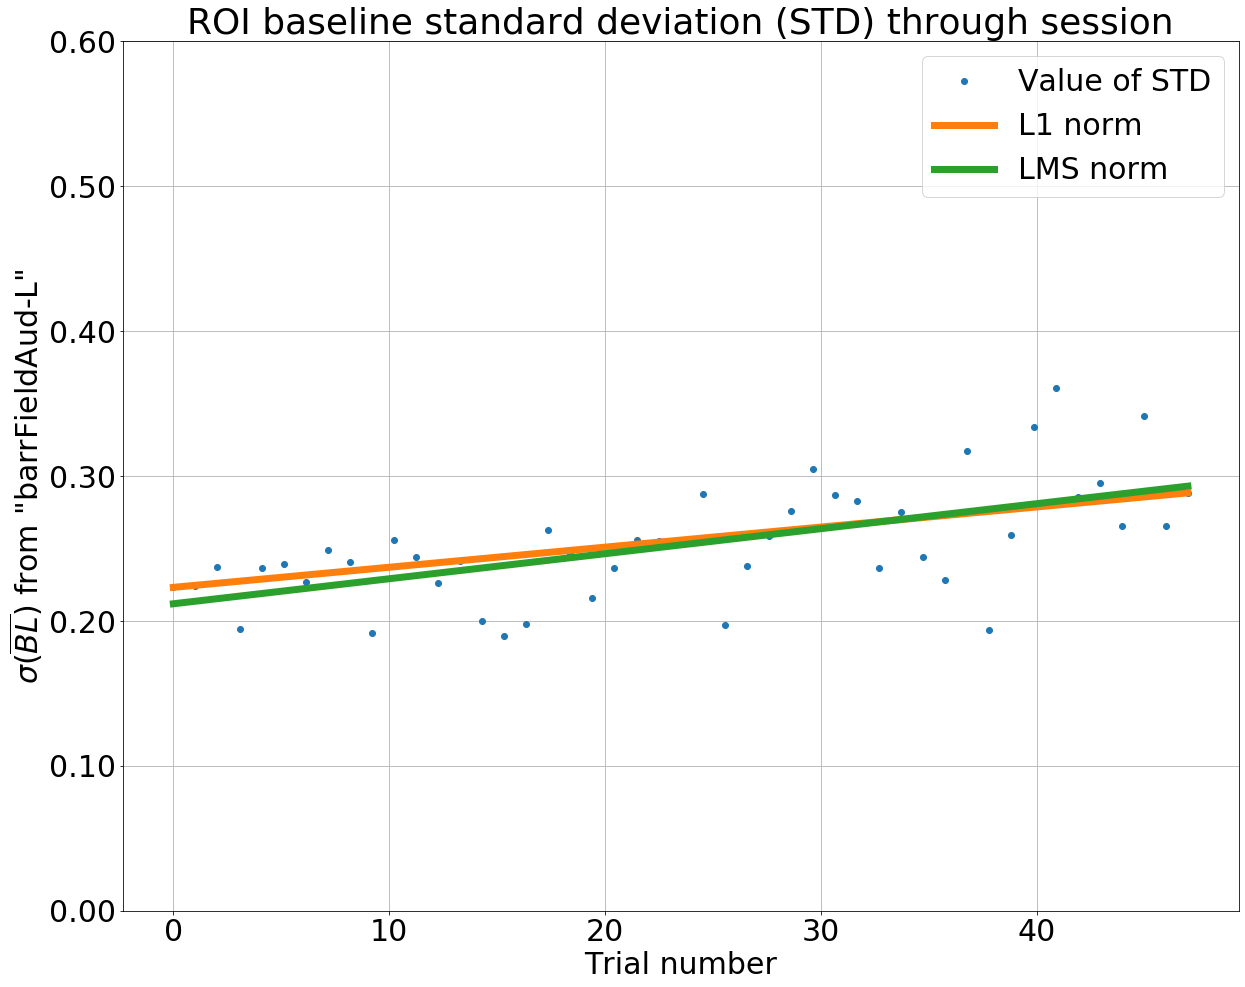

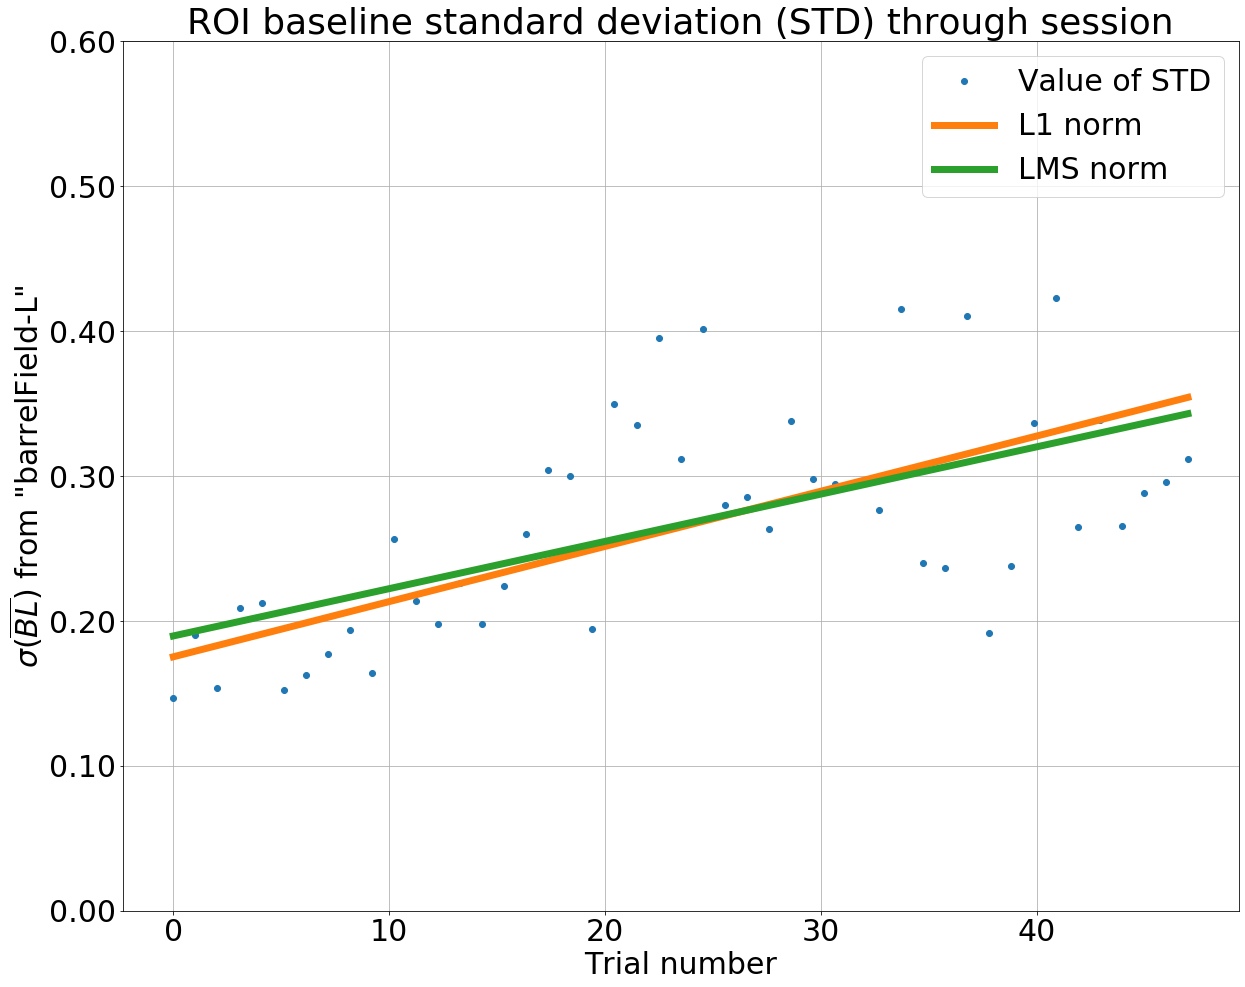

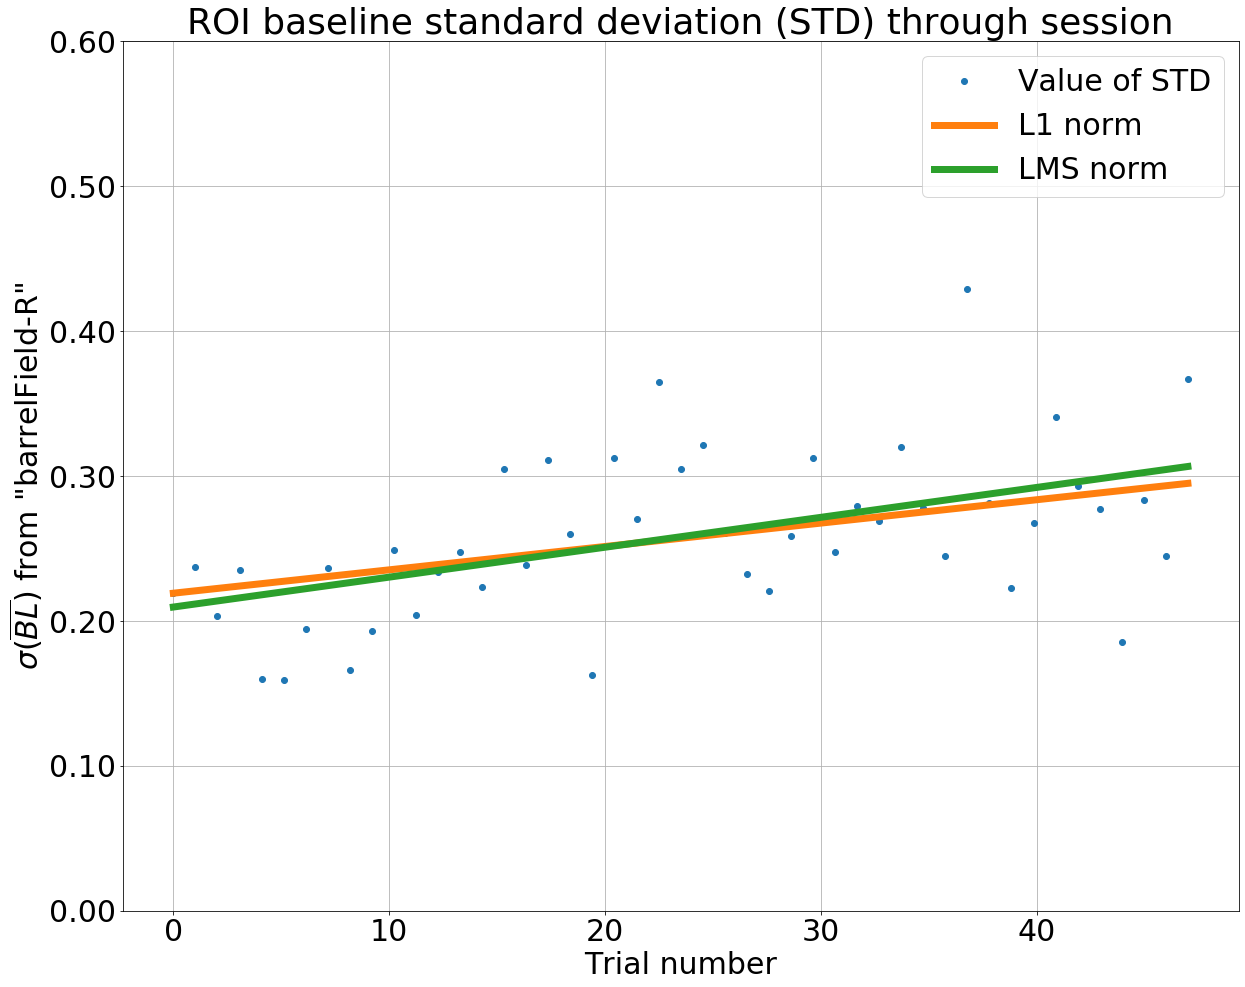

In [21]:
plt.rcParams['figure.figsize'] = [20, 16]
plt.rcParams.update({'font.size': 30})


for ROI in ROIs:
    plt.figure()
    
    plt.plot(x_BL, meanBL[ROI+'_std'], 'o')
    plt.plot(x_BL, meanBL[ROI + '_l1'], '-',  linewidth=7)
    plt.plot(x_BL, meanBL[ROI + '_l2'], '-',  linewidth=7)
    
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([0, 0.6])
    plt.legend(('Value of STD', 'L1 norm', 'LMS norm'), loc='upper right')
    plt.title('ROI baseline standard deviation (STD) through session')
    plt.ylabel(r'$\sigma$' + r'($\overline {BL}$)' + f' from "{ROI}"')
    plt.xlabel('Trial number')
    plt.grid()
    if savefigs:
        saveFig('STD_of_' + f'{ROI}_BL' + f' mouse-{subject}_' + f'{session}' + '.svg')

plt.show()

In [22]:
#Group results by BLOCKS - 
if session == 'N_ROIs':
    group_by = 5
else:
    group_by = 3

blockDict = {}
for ROI in ROIs:
    blockDict[ROI] = list(zip(*[iter(dataDict[ROI])]*group_by))

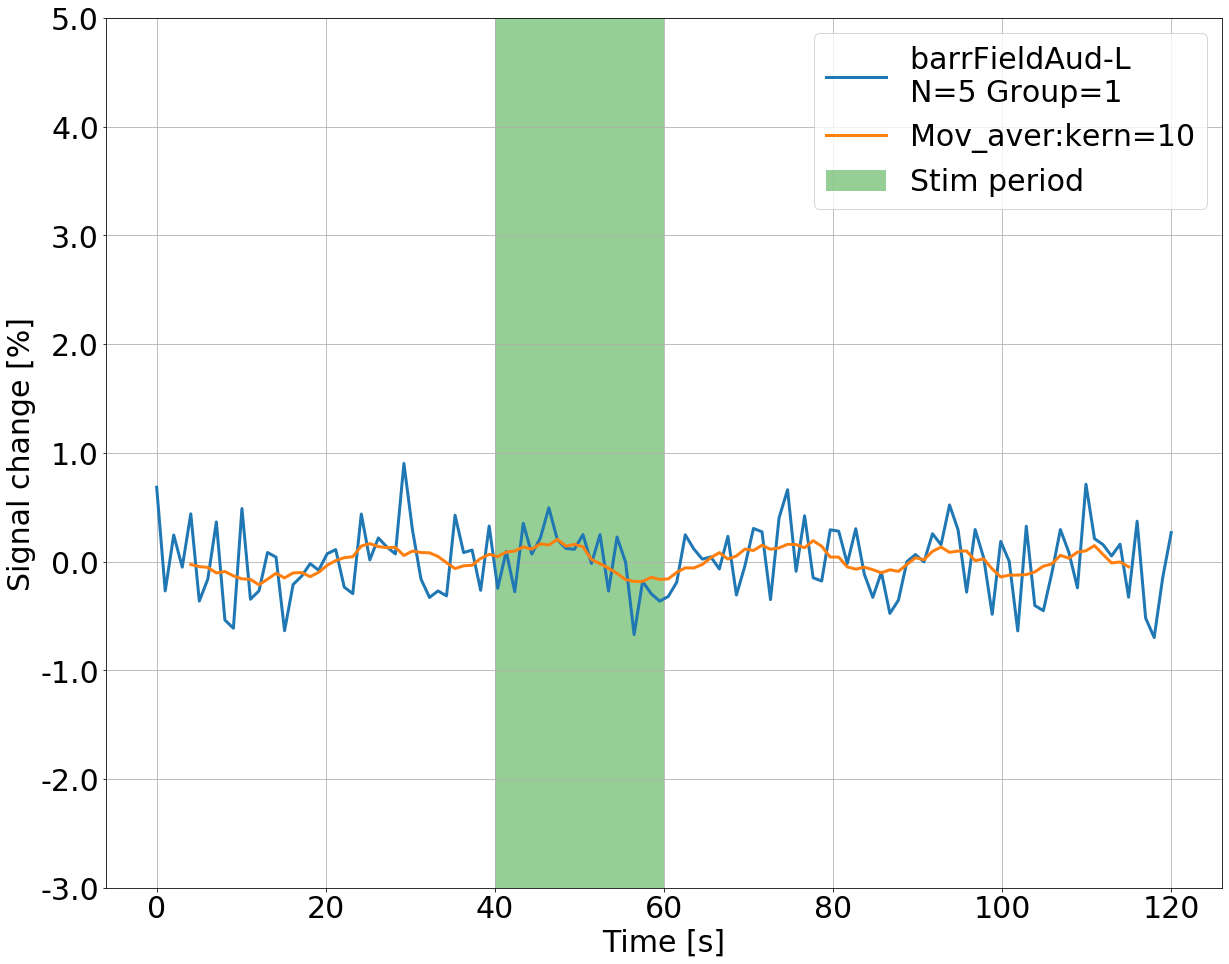

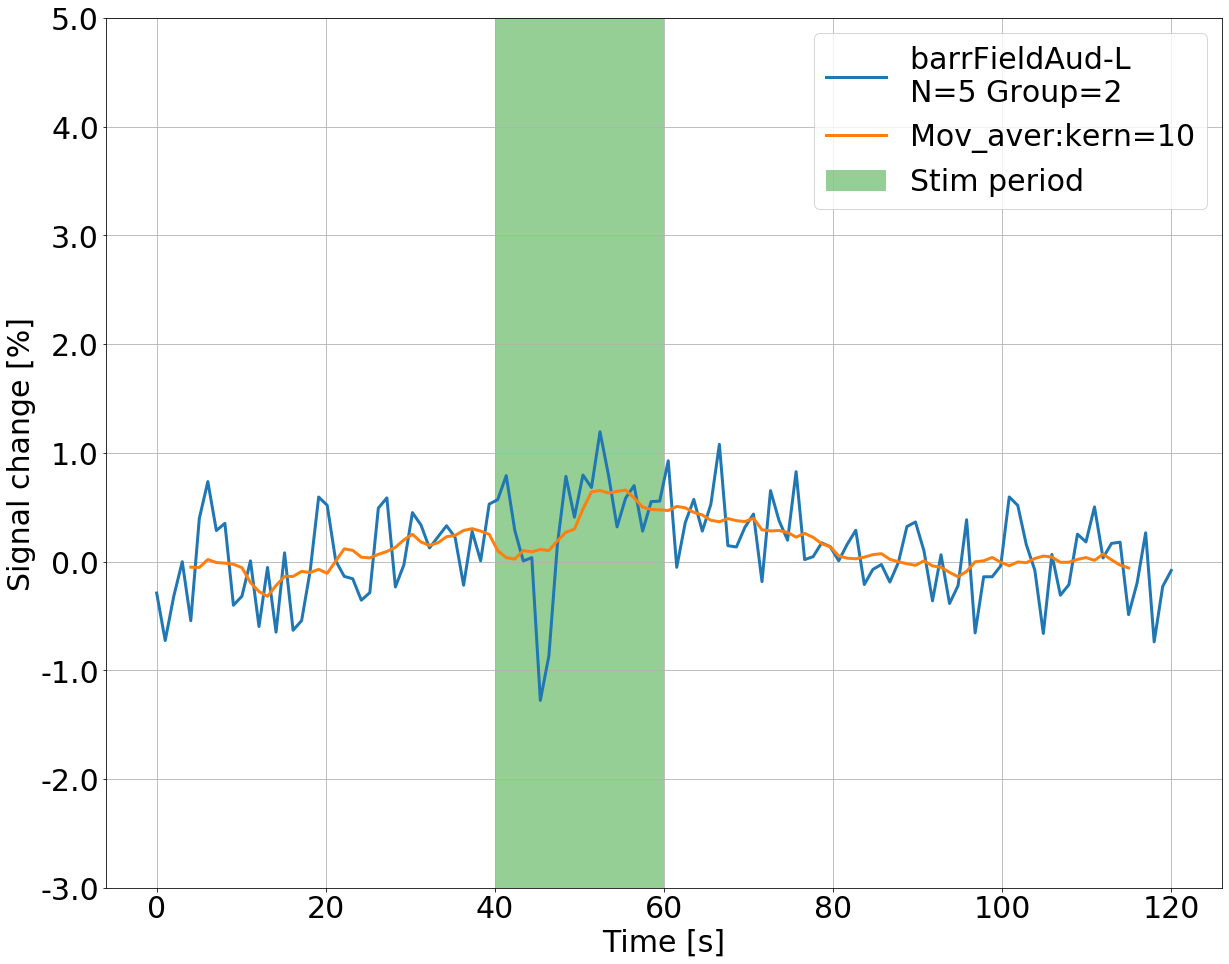

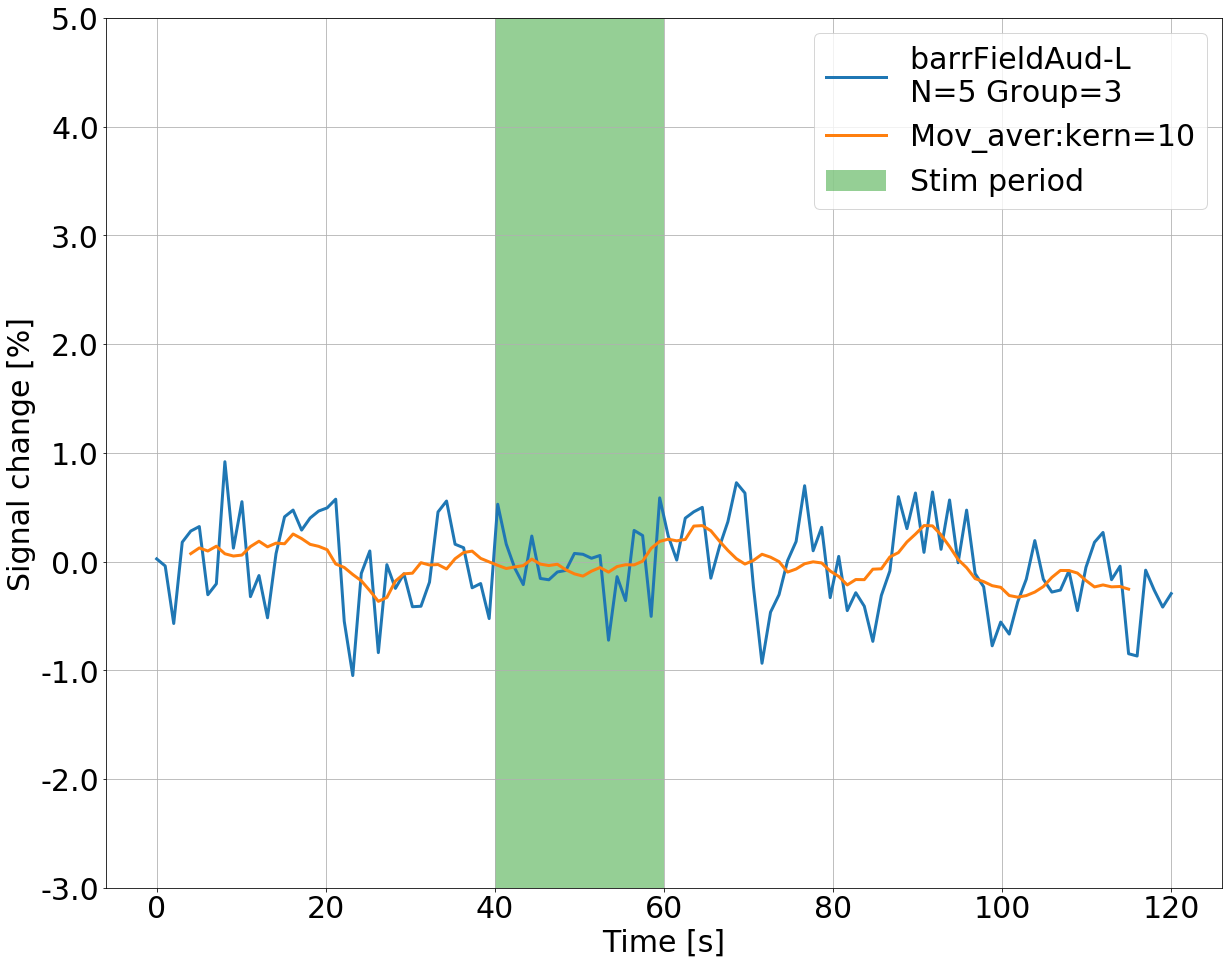

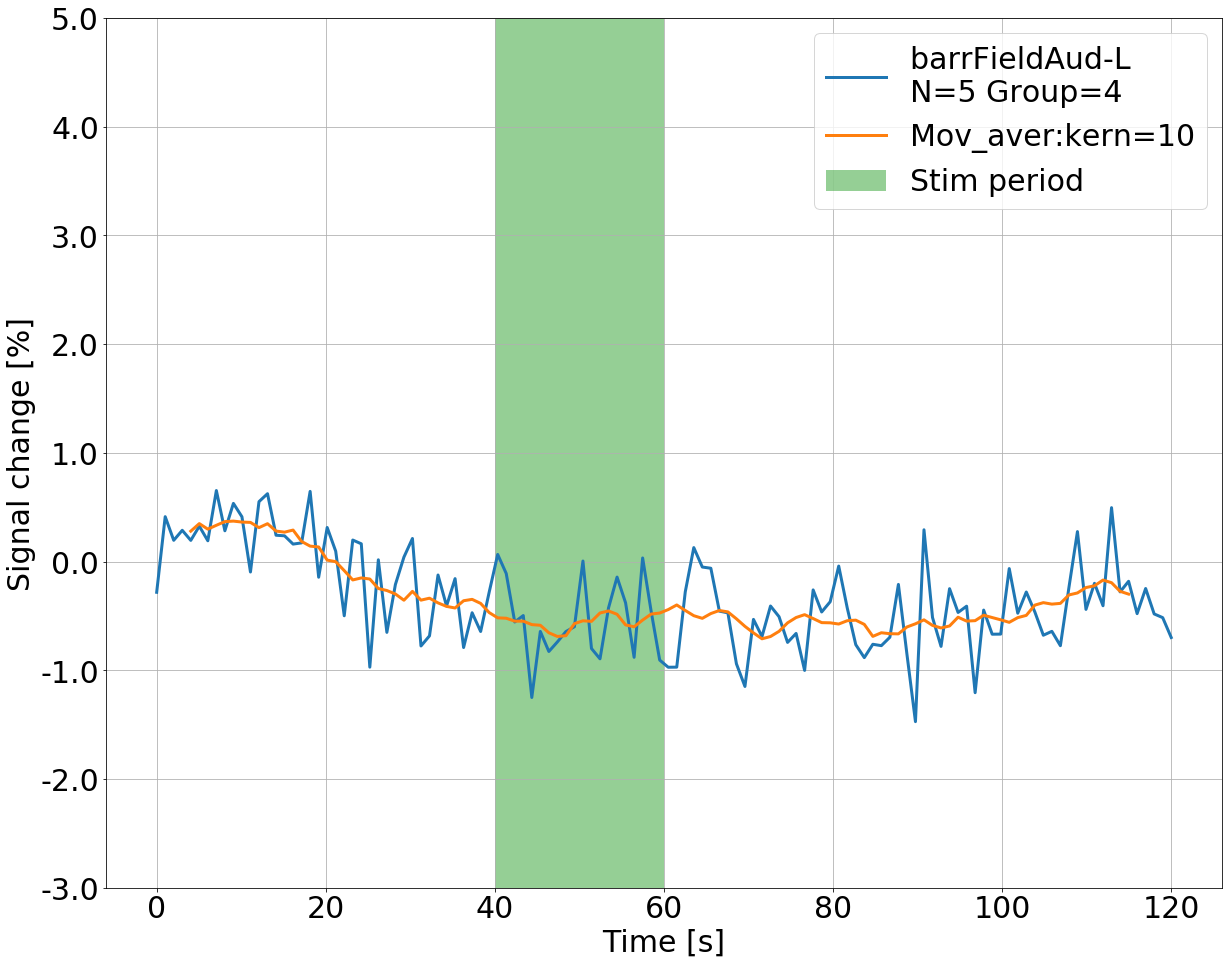

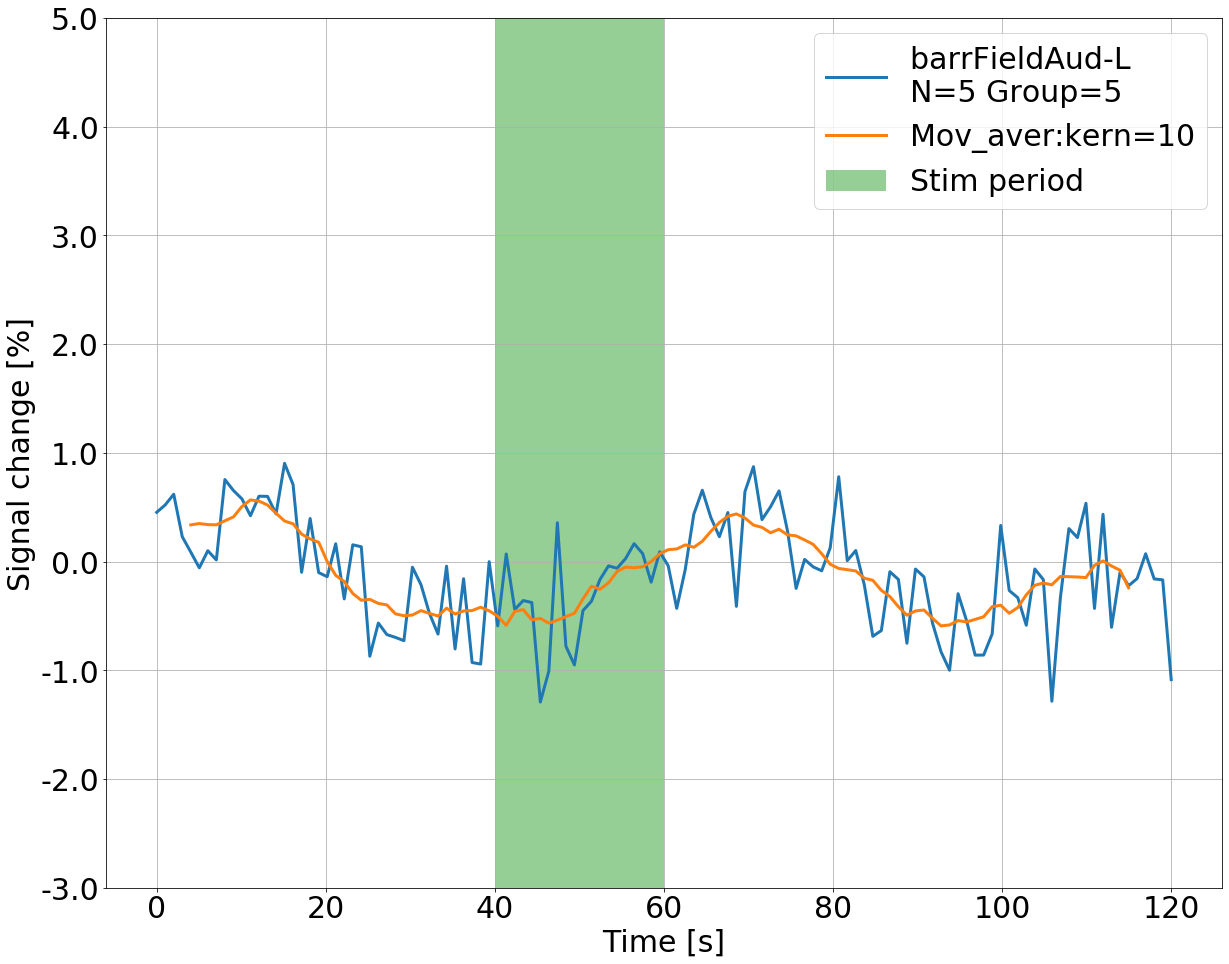

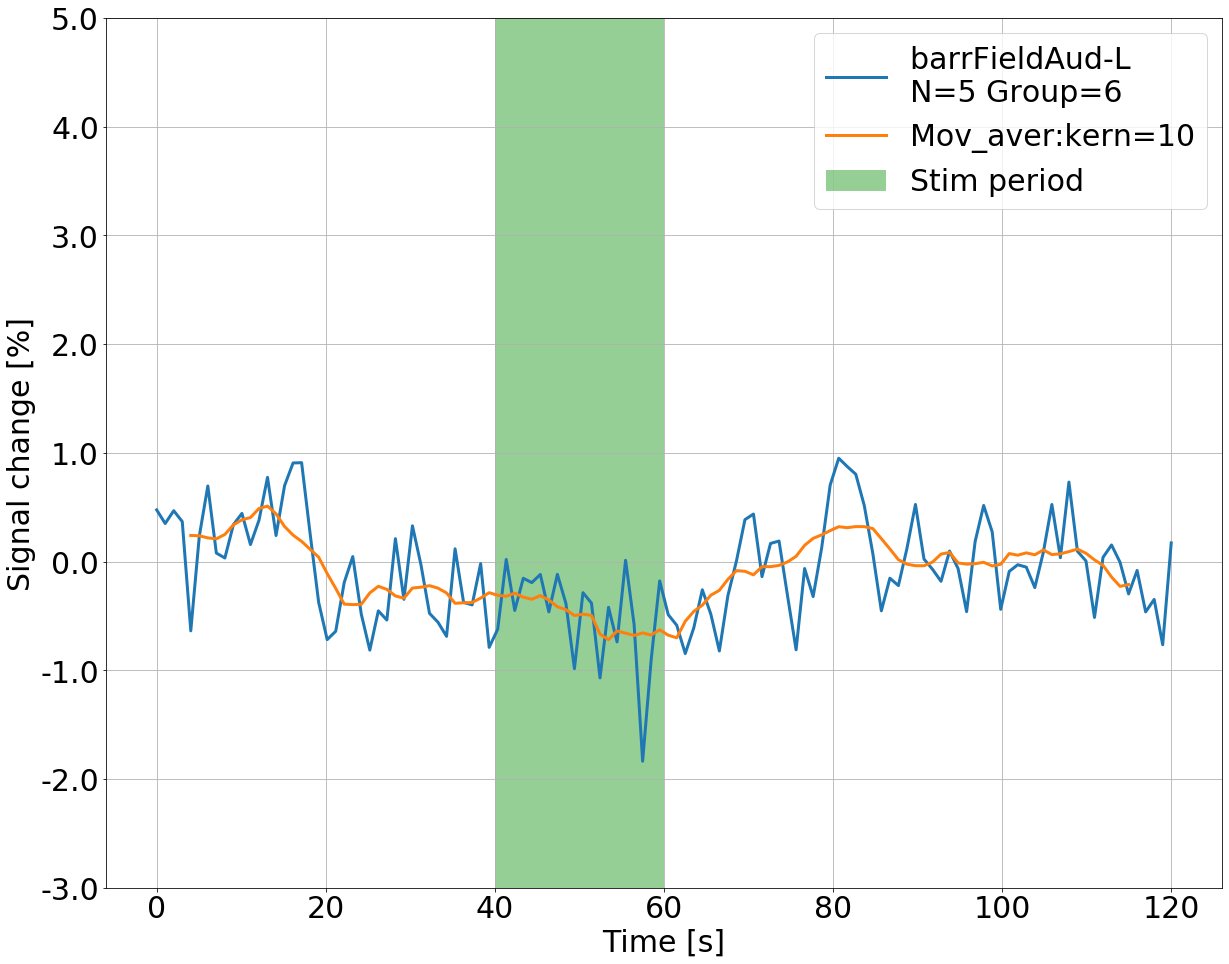

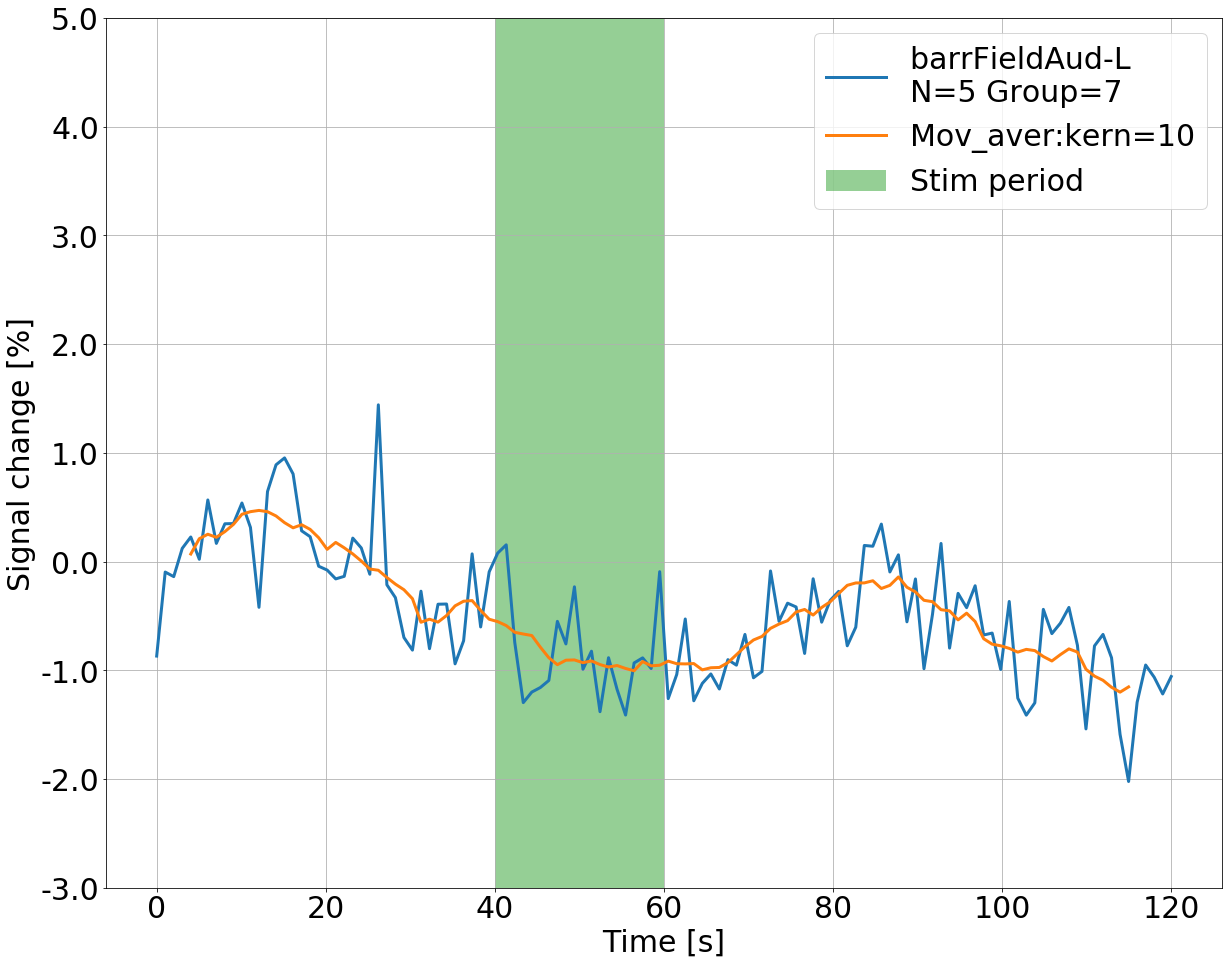

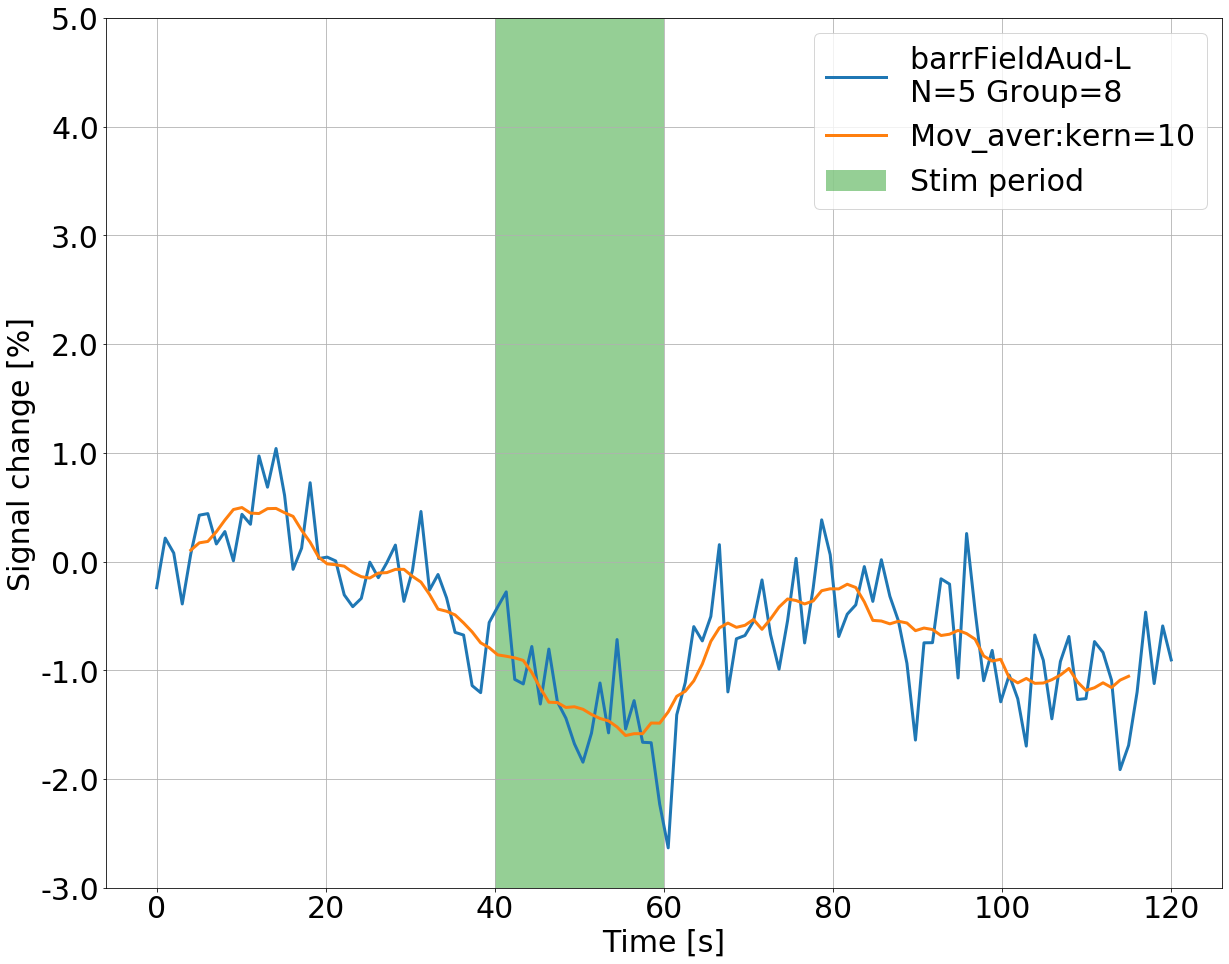

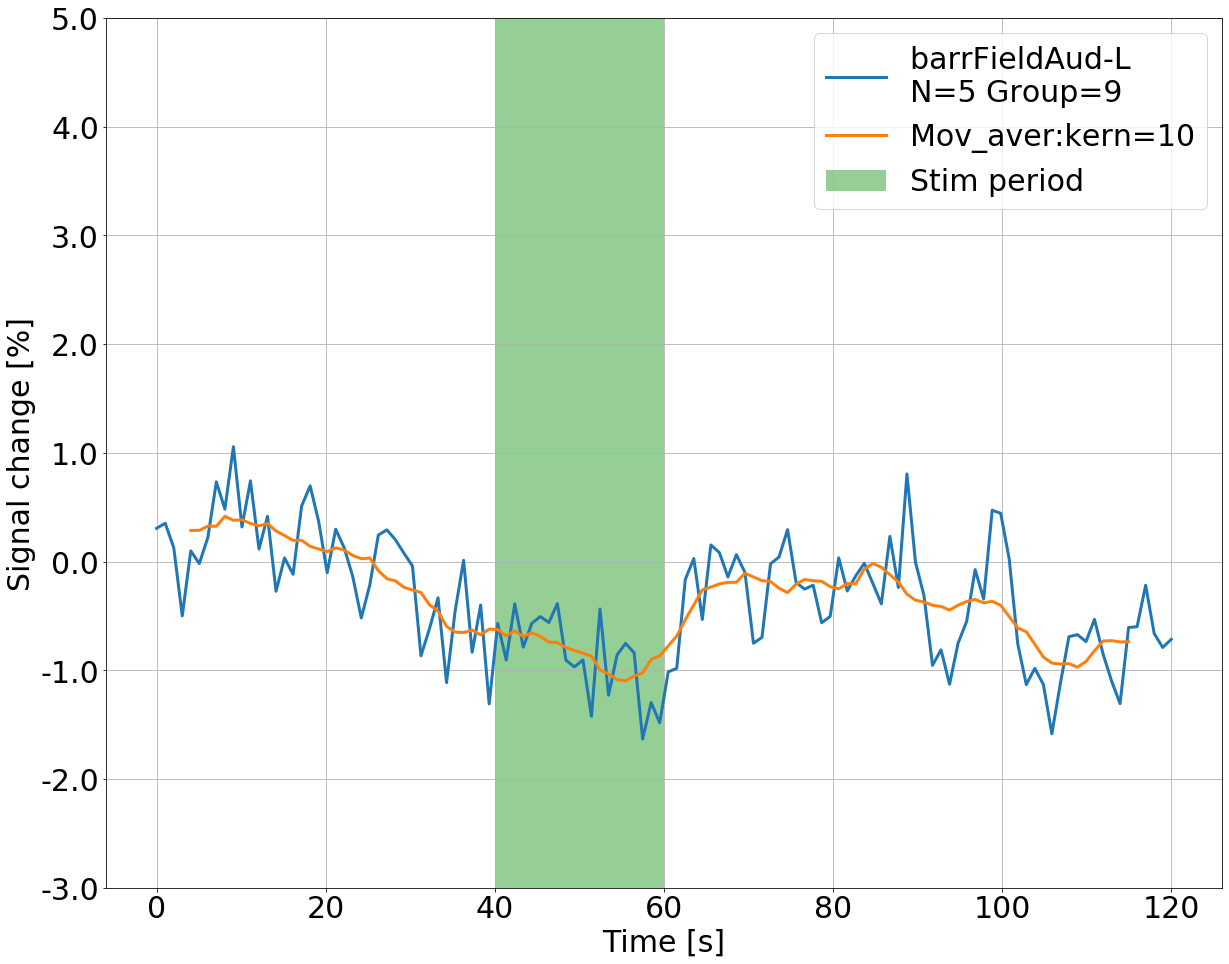

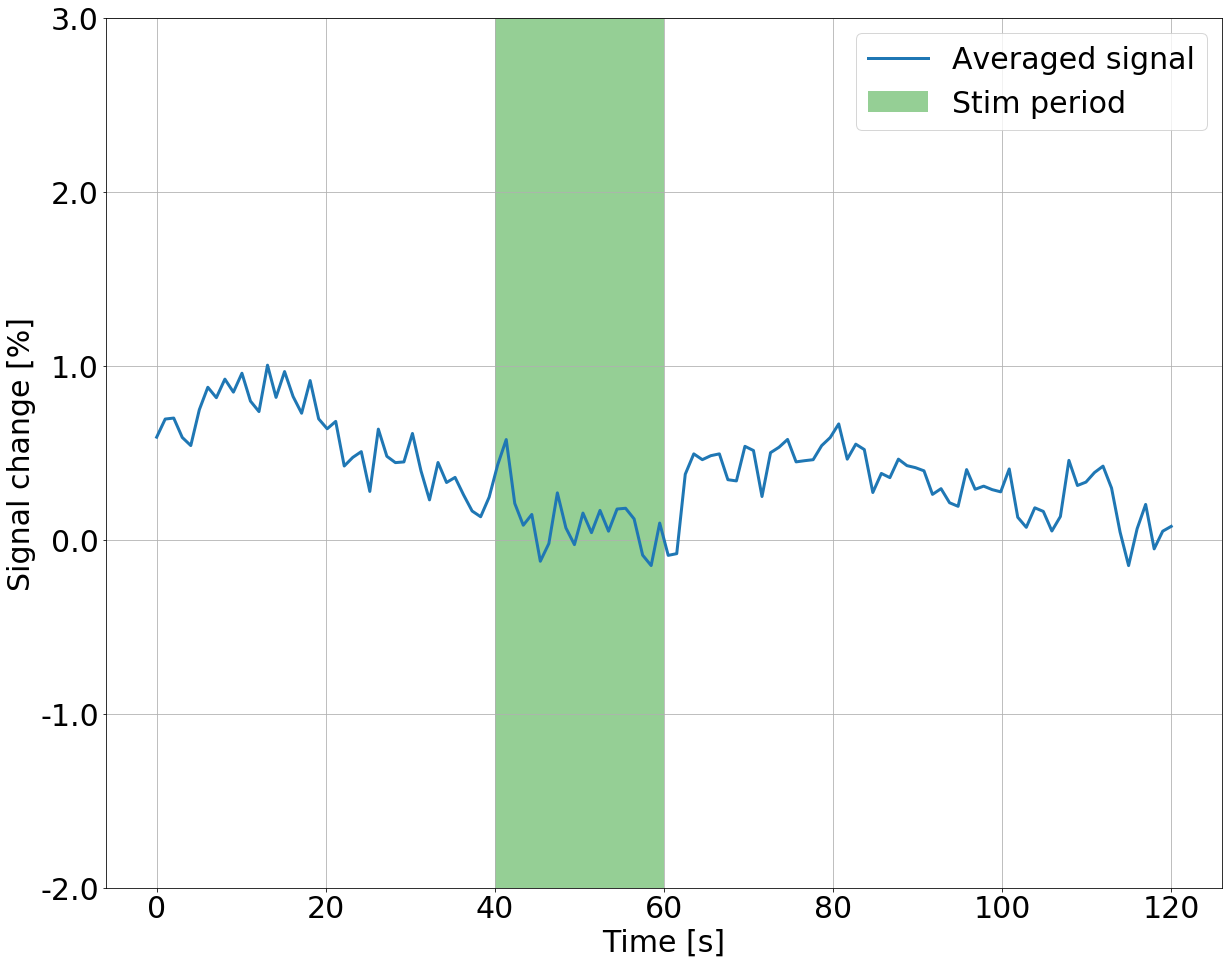

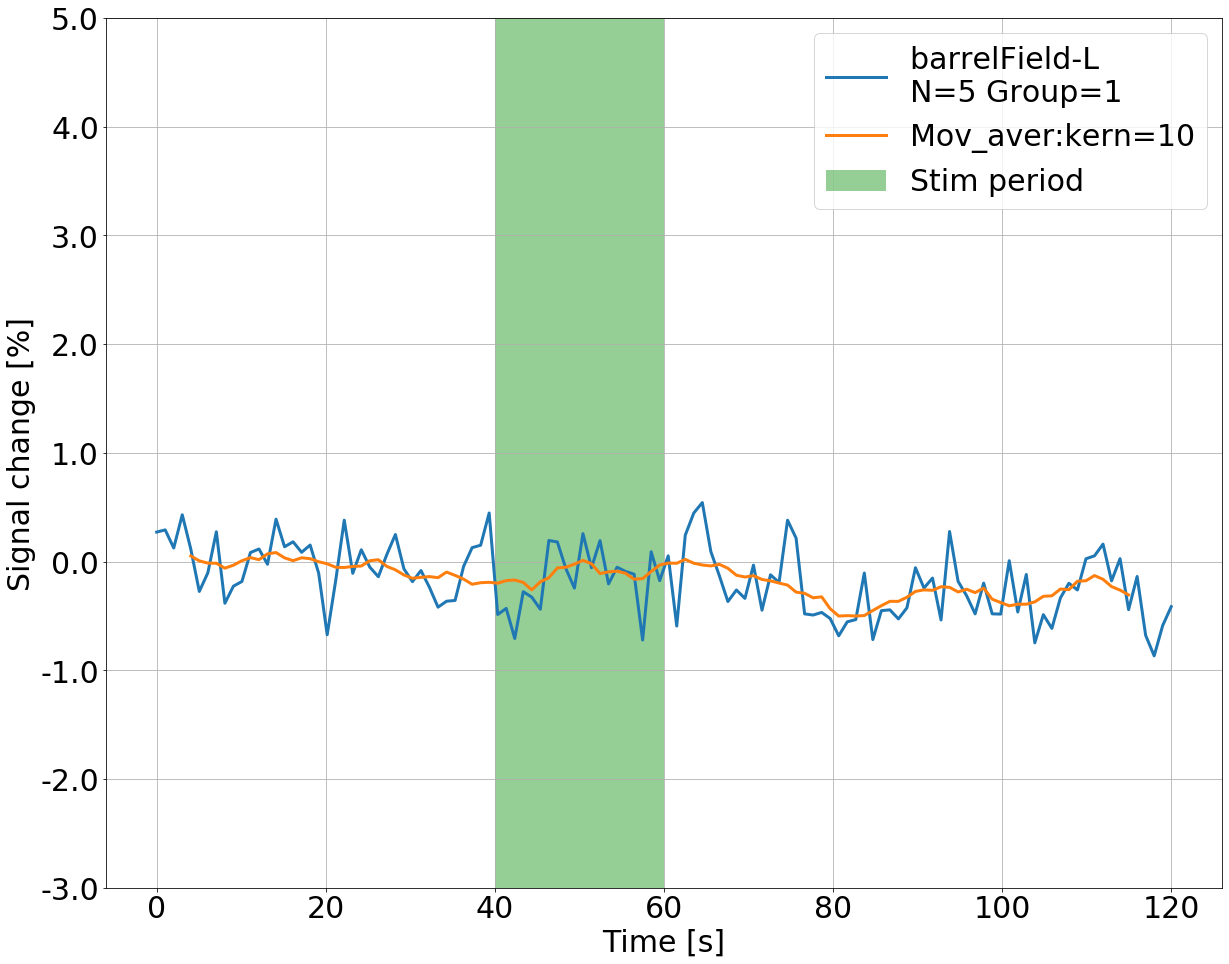

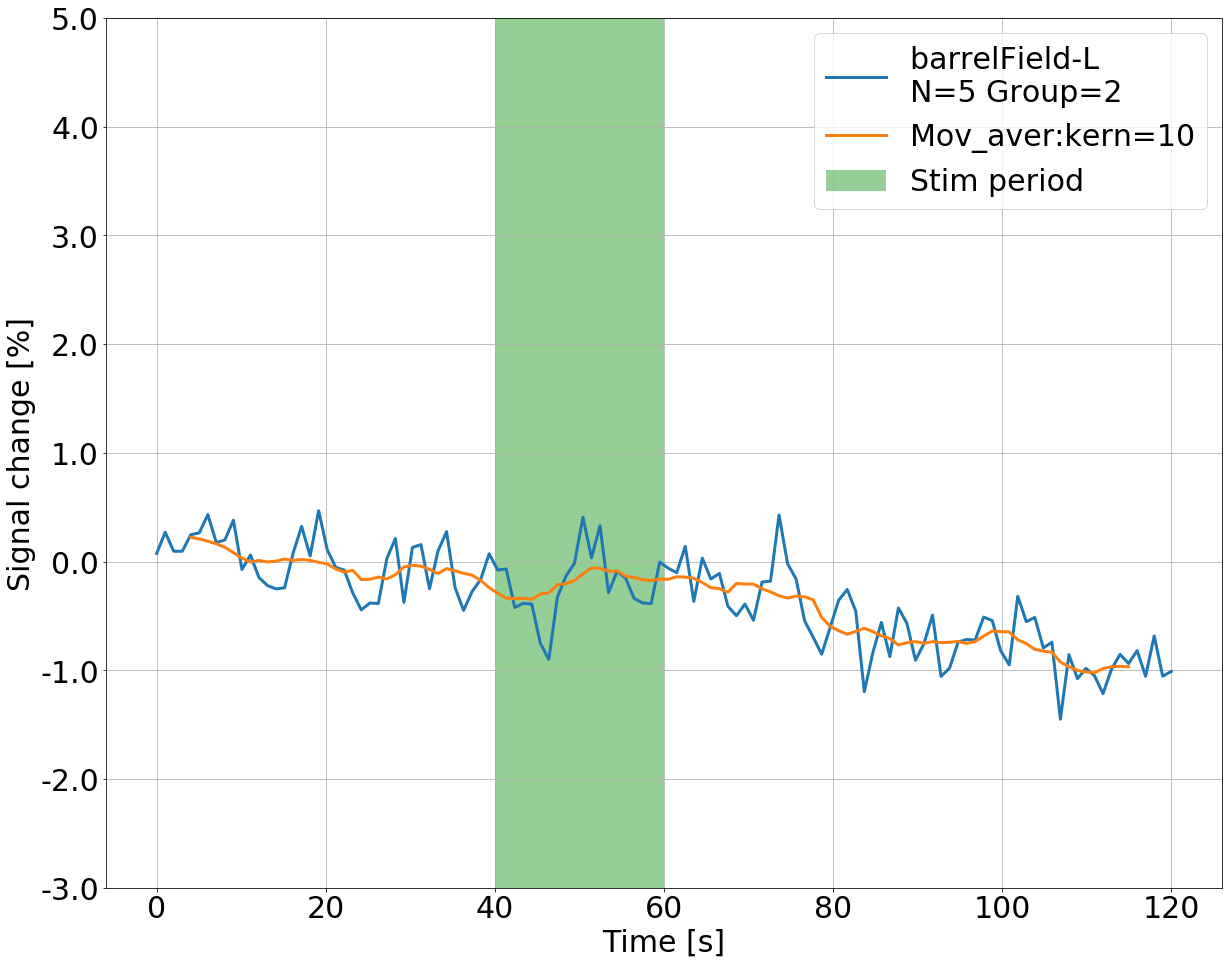

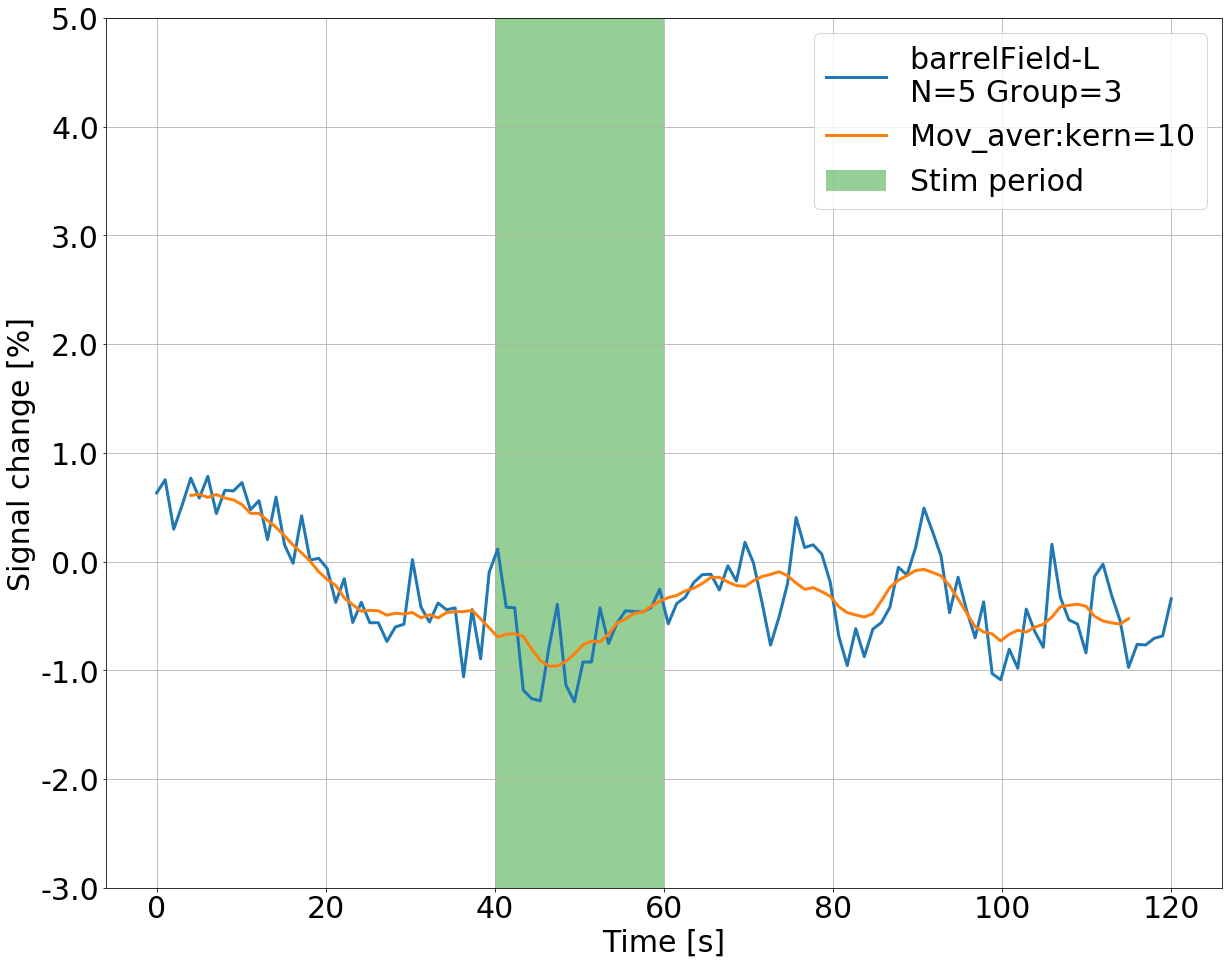

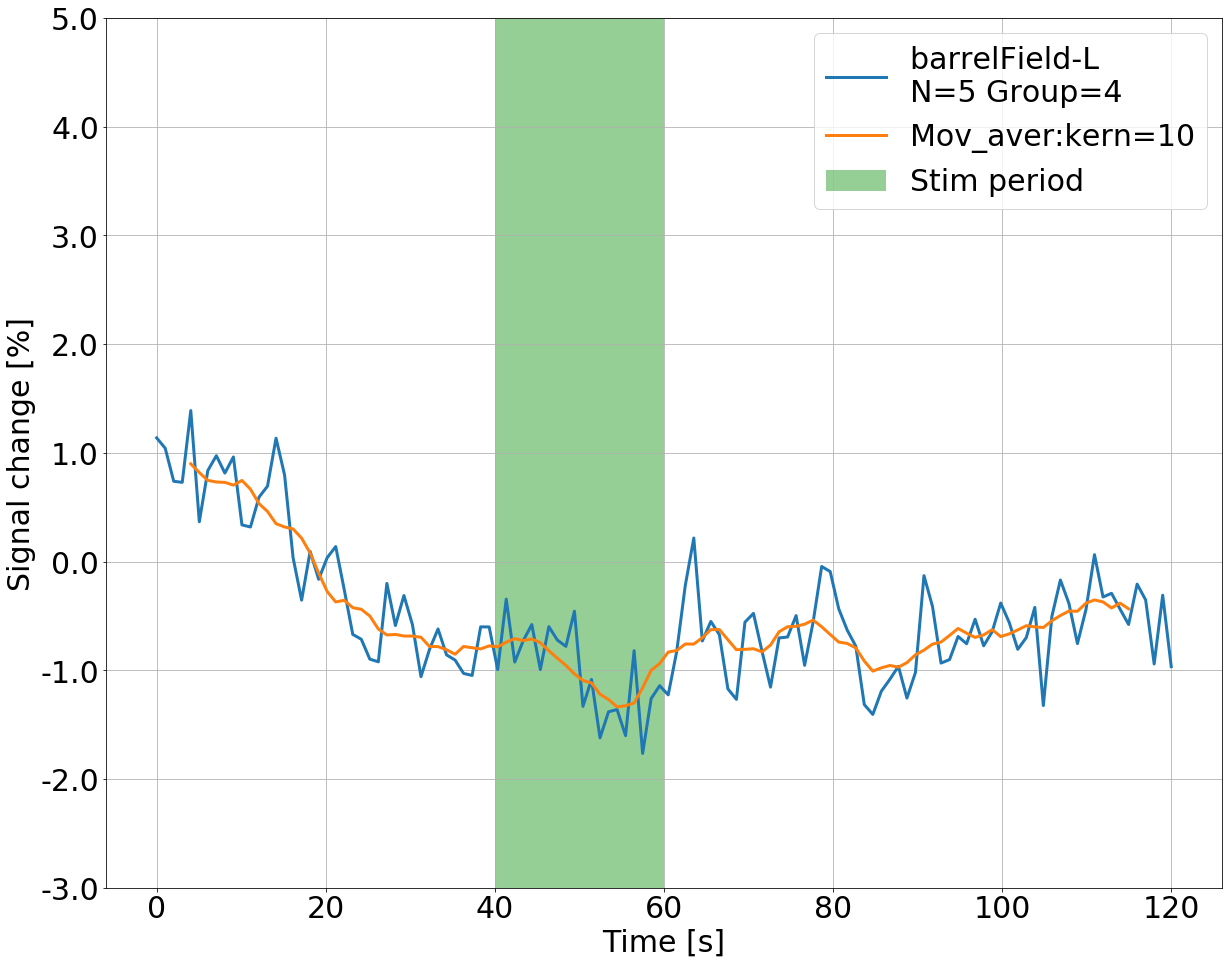

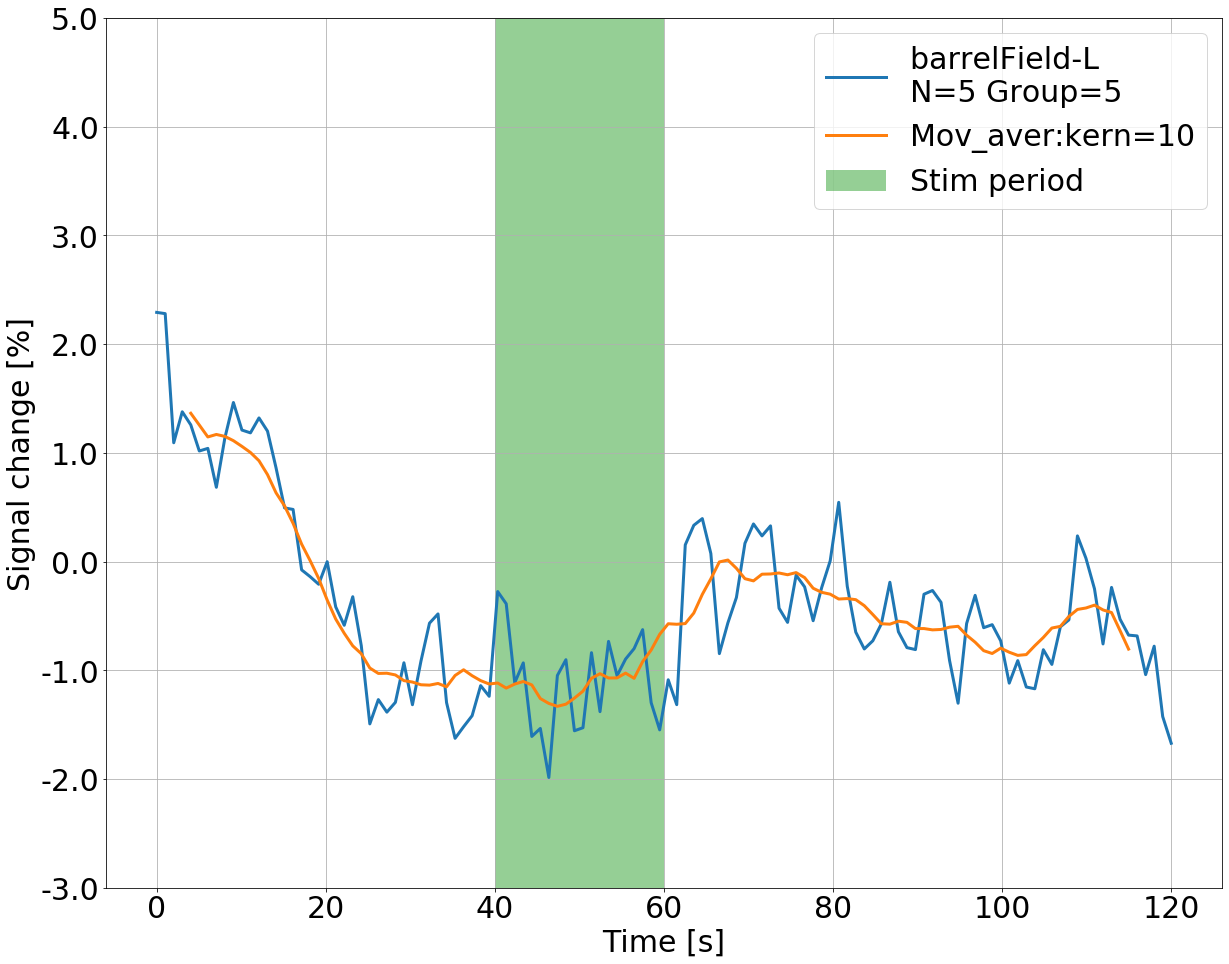

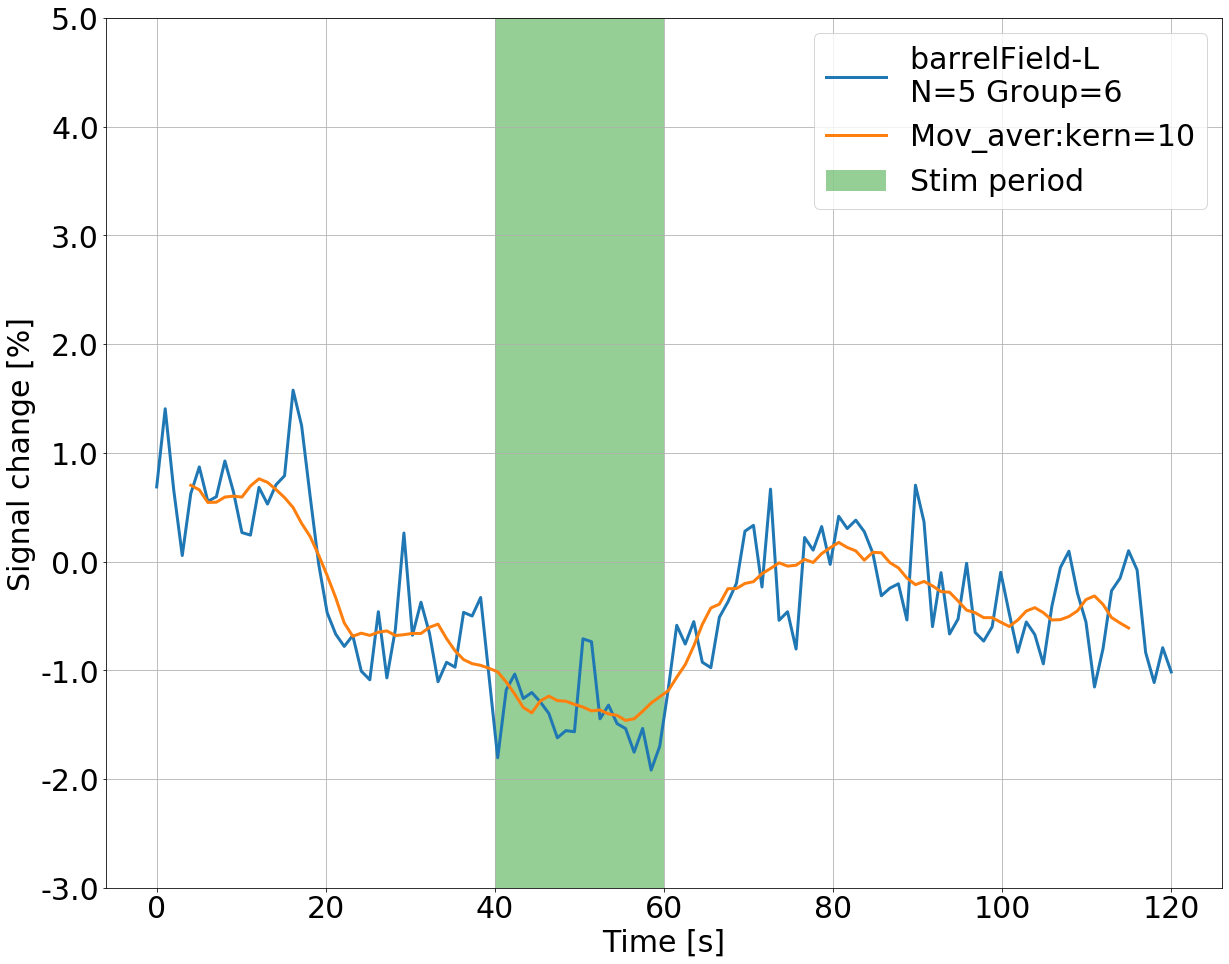

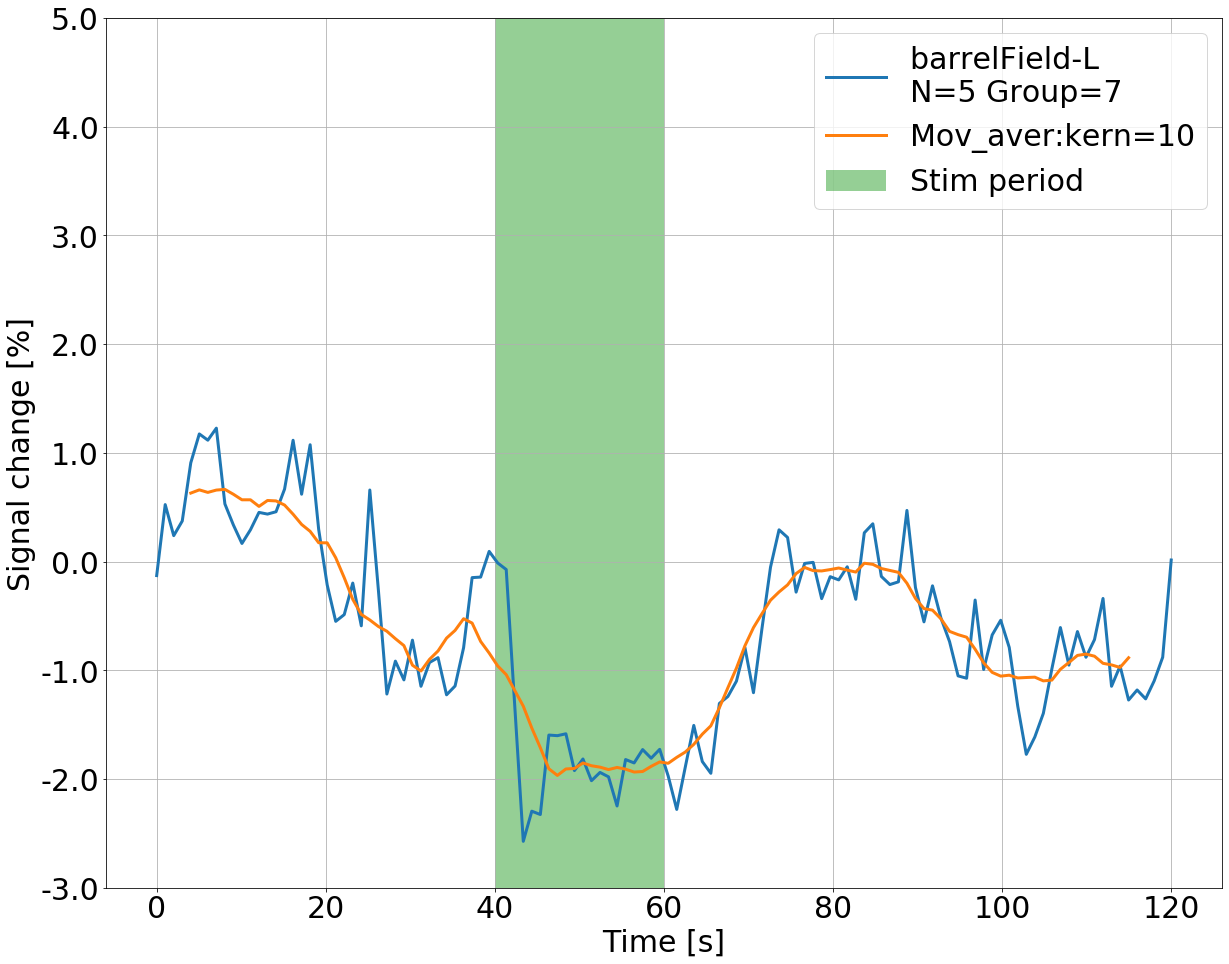

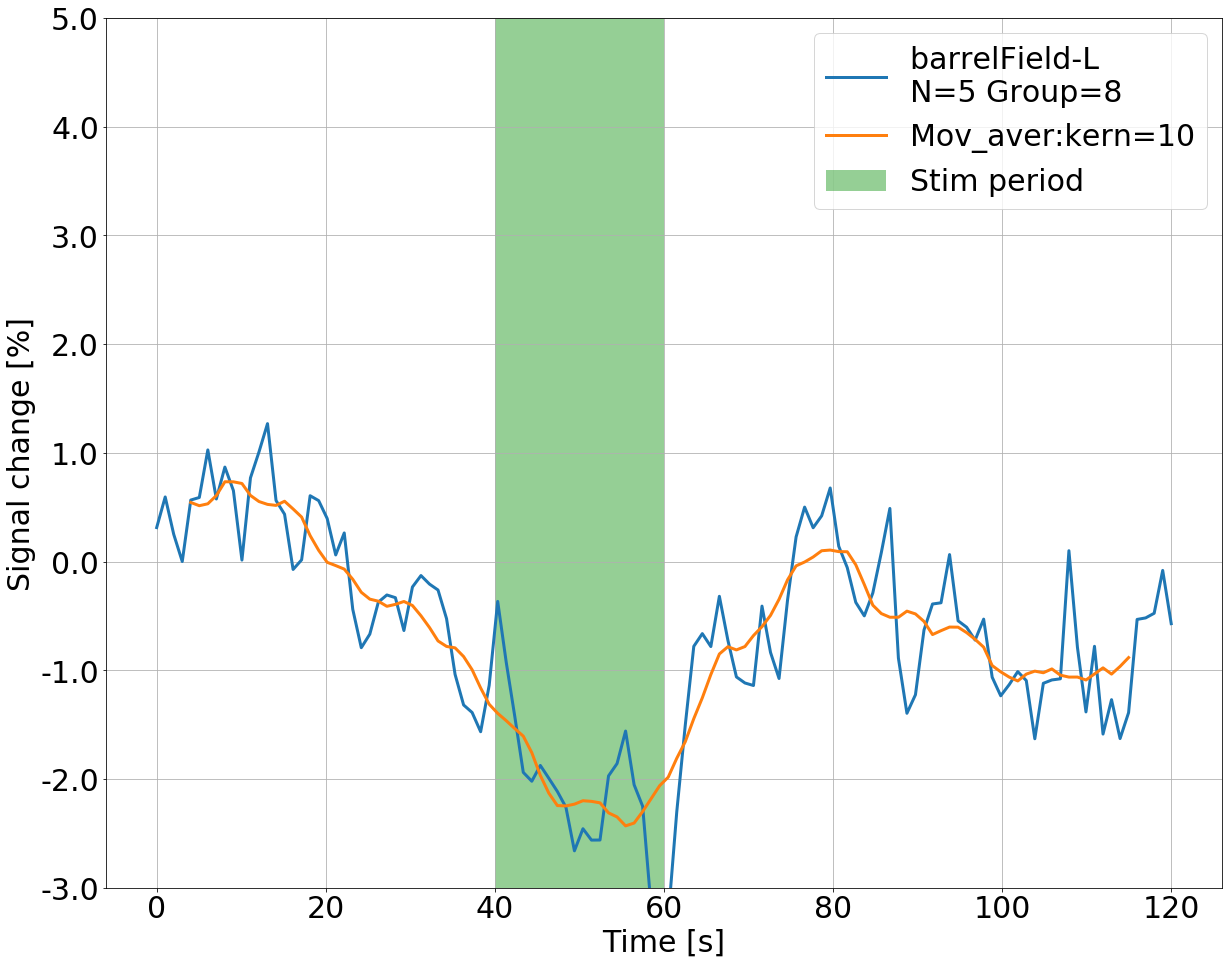

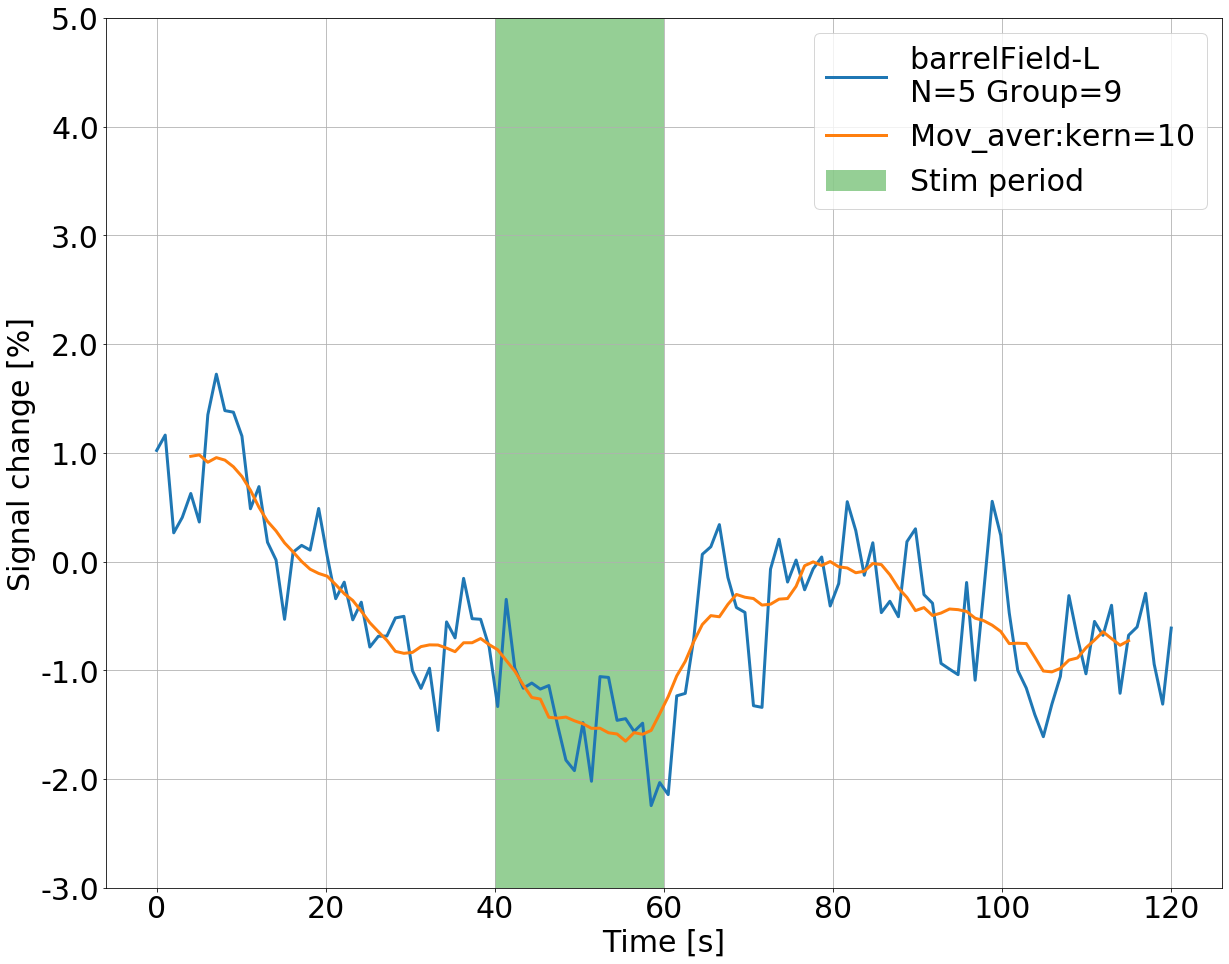

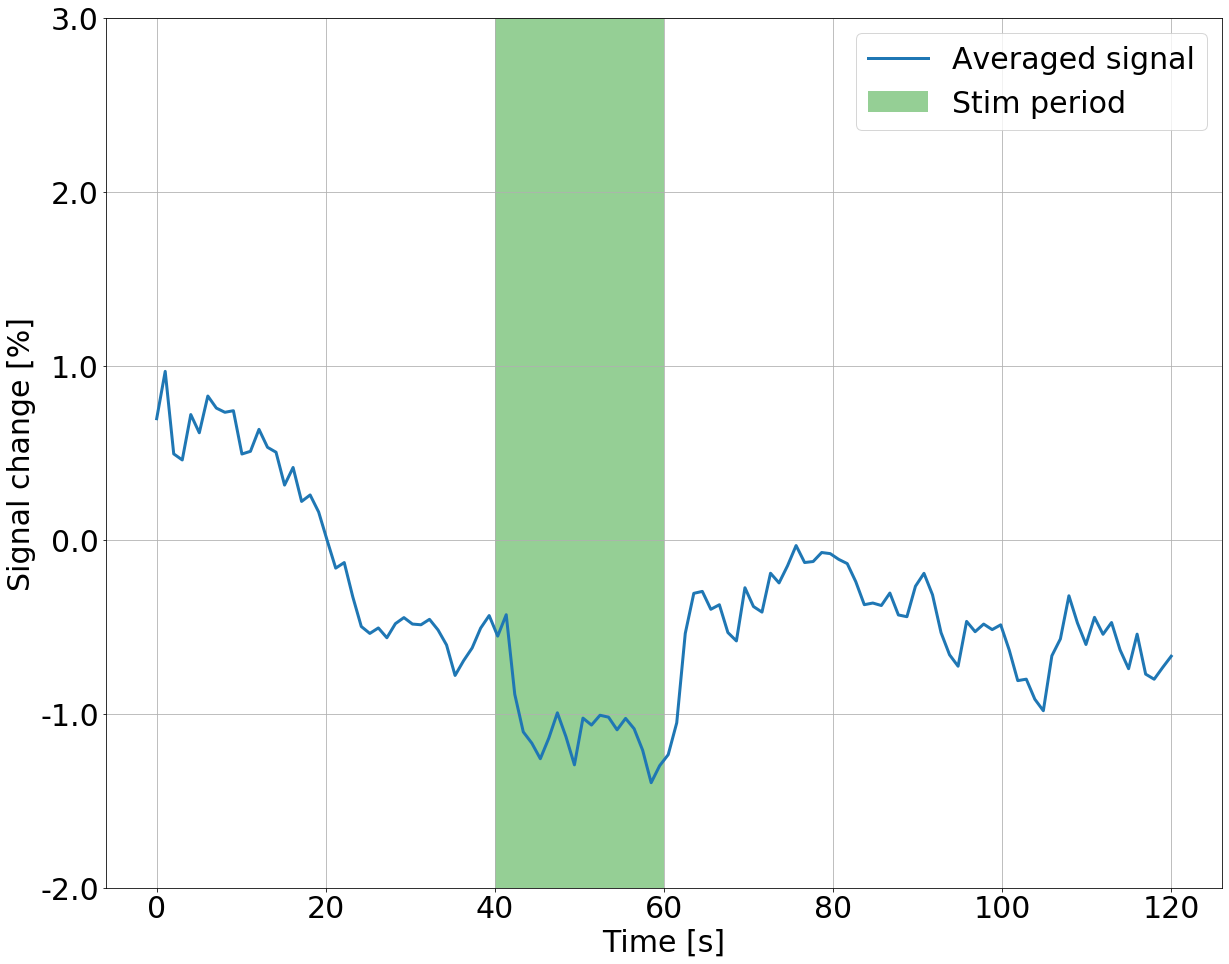

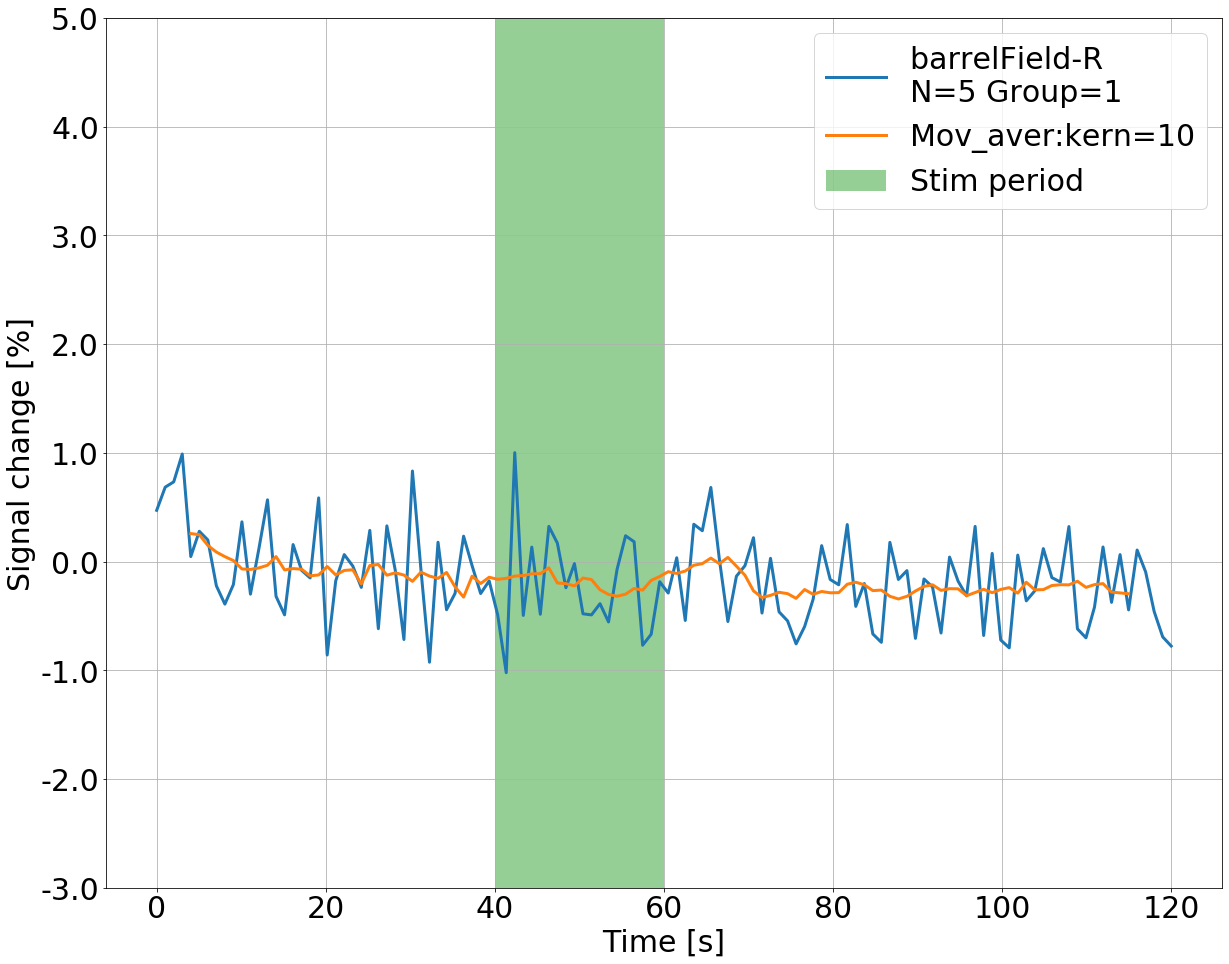

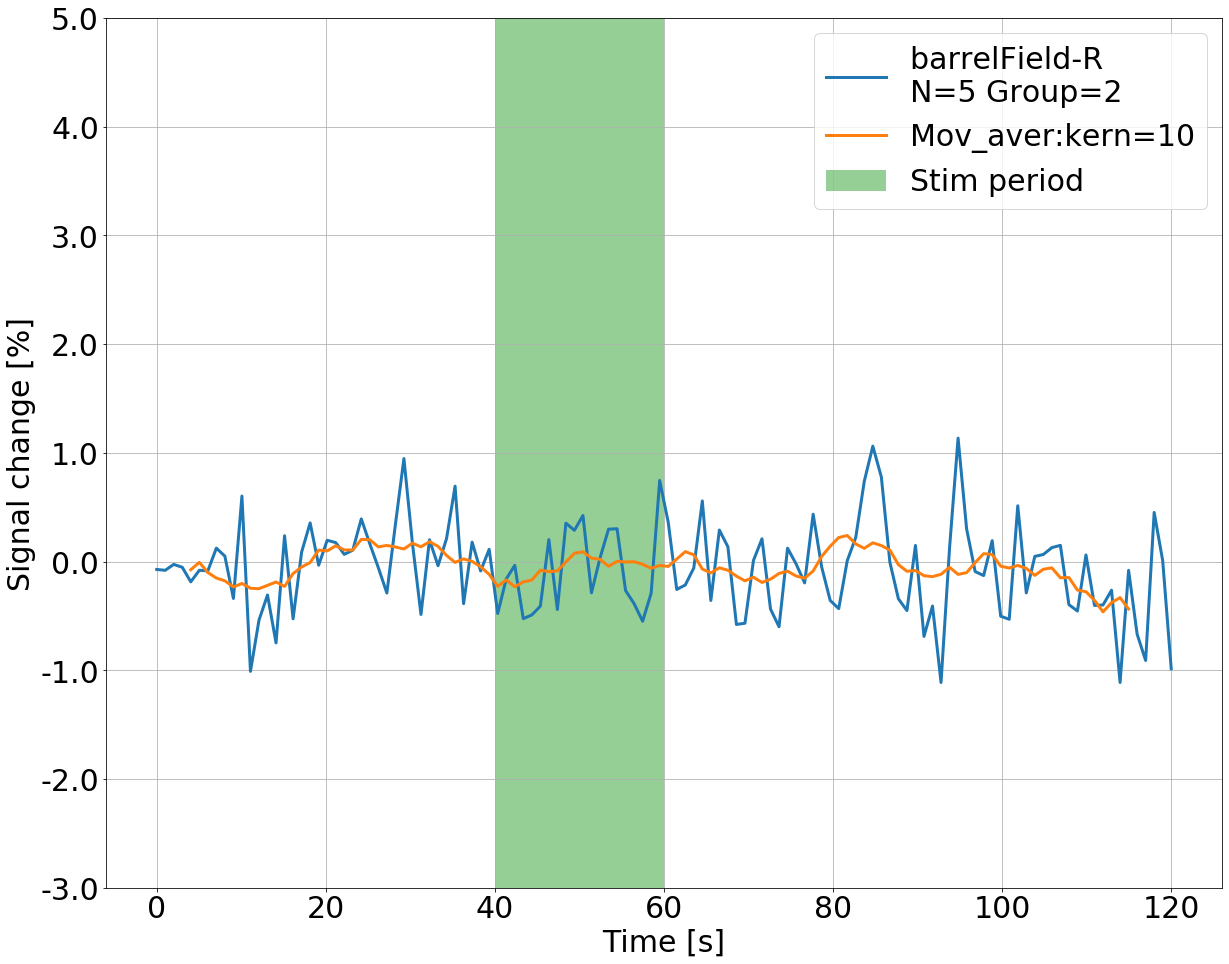

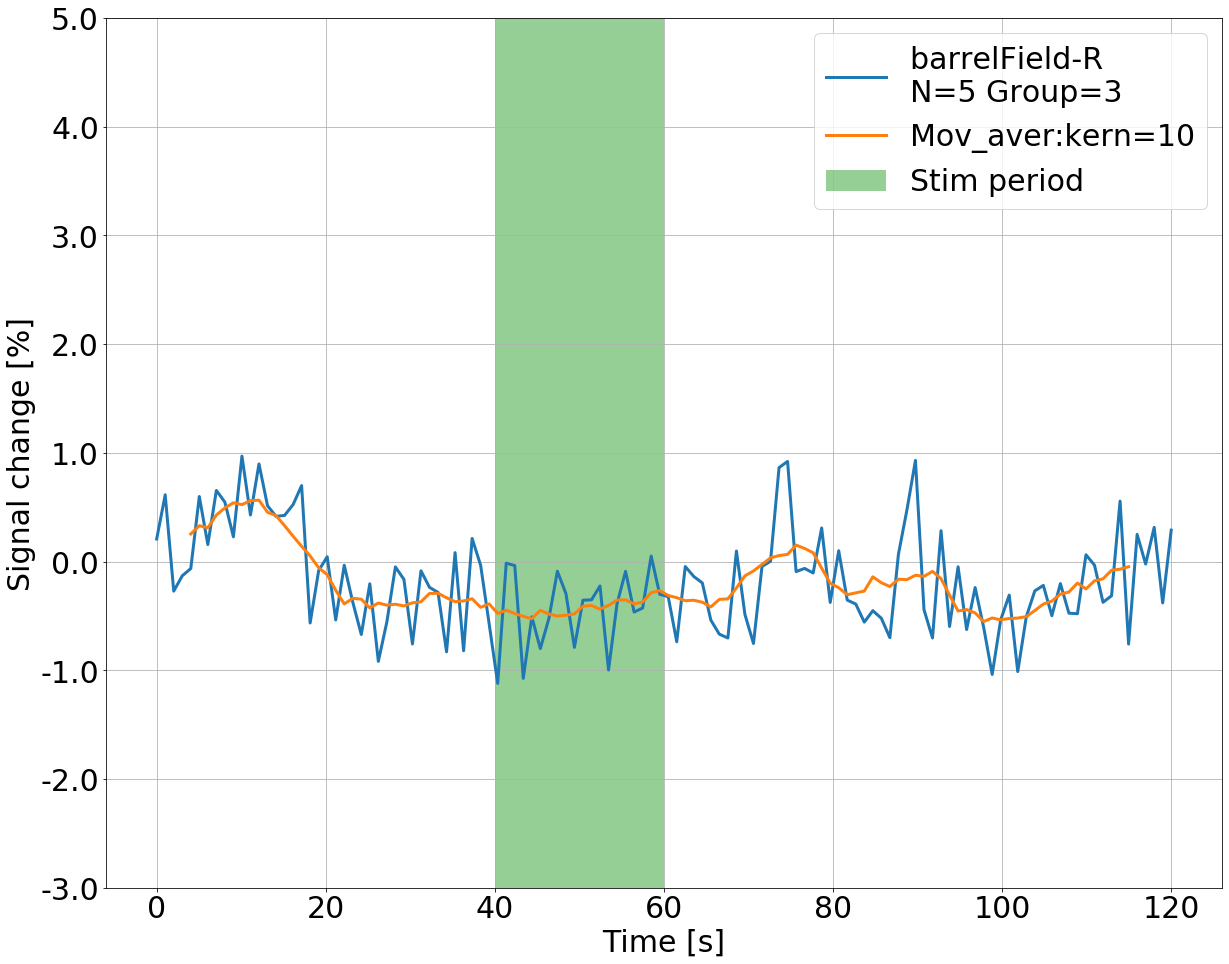

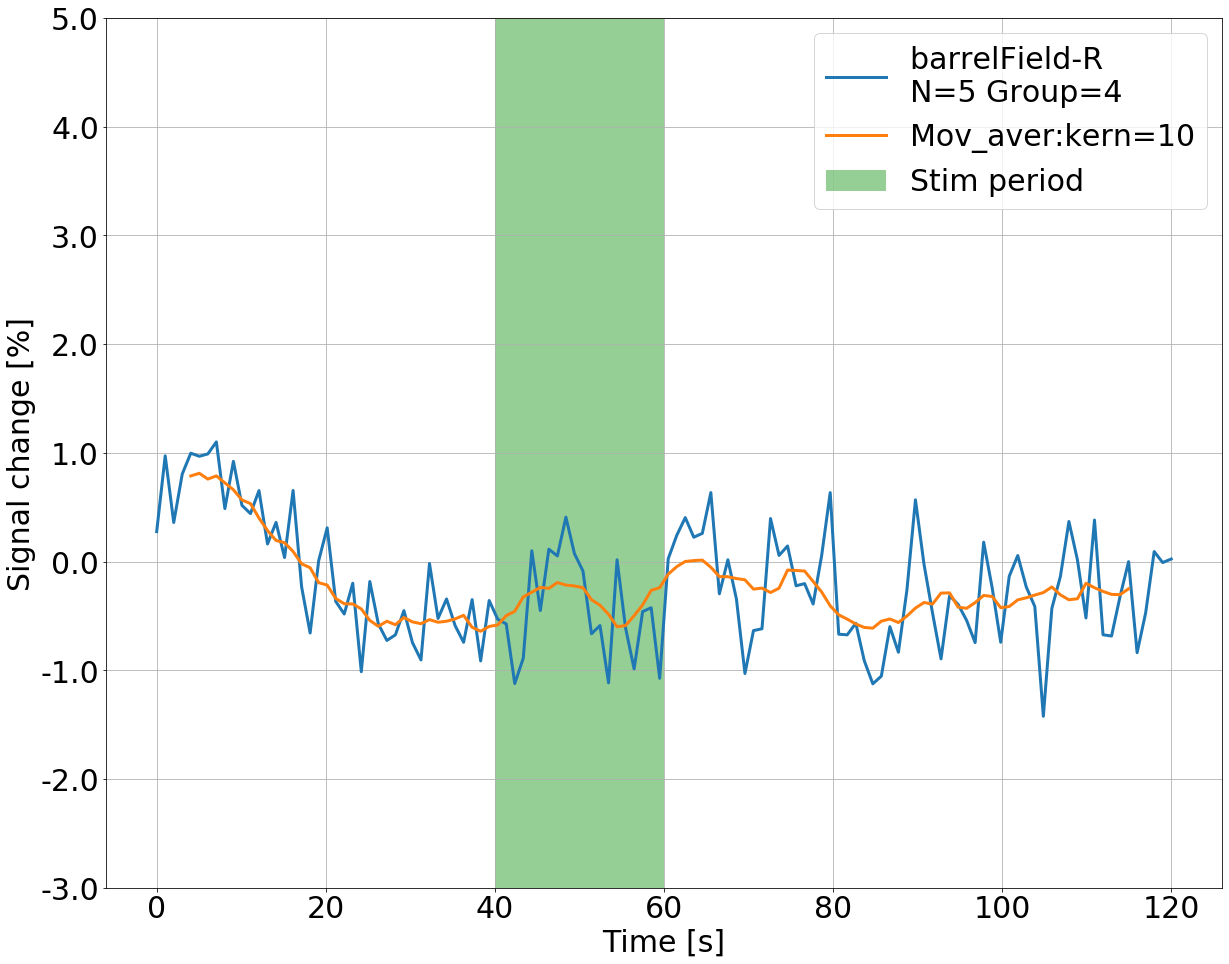

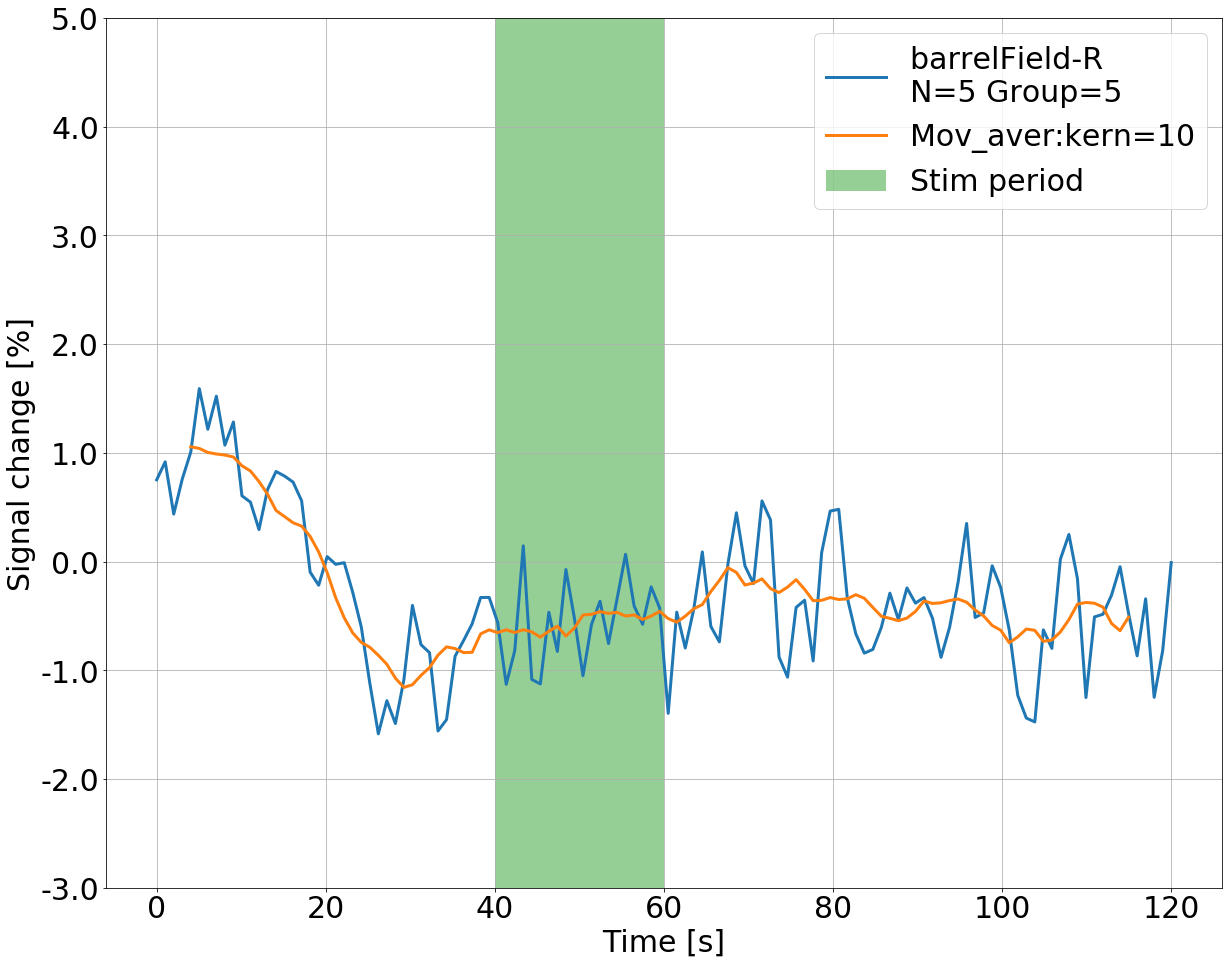

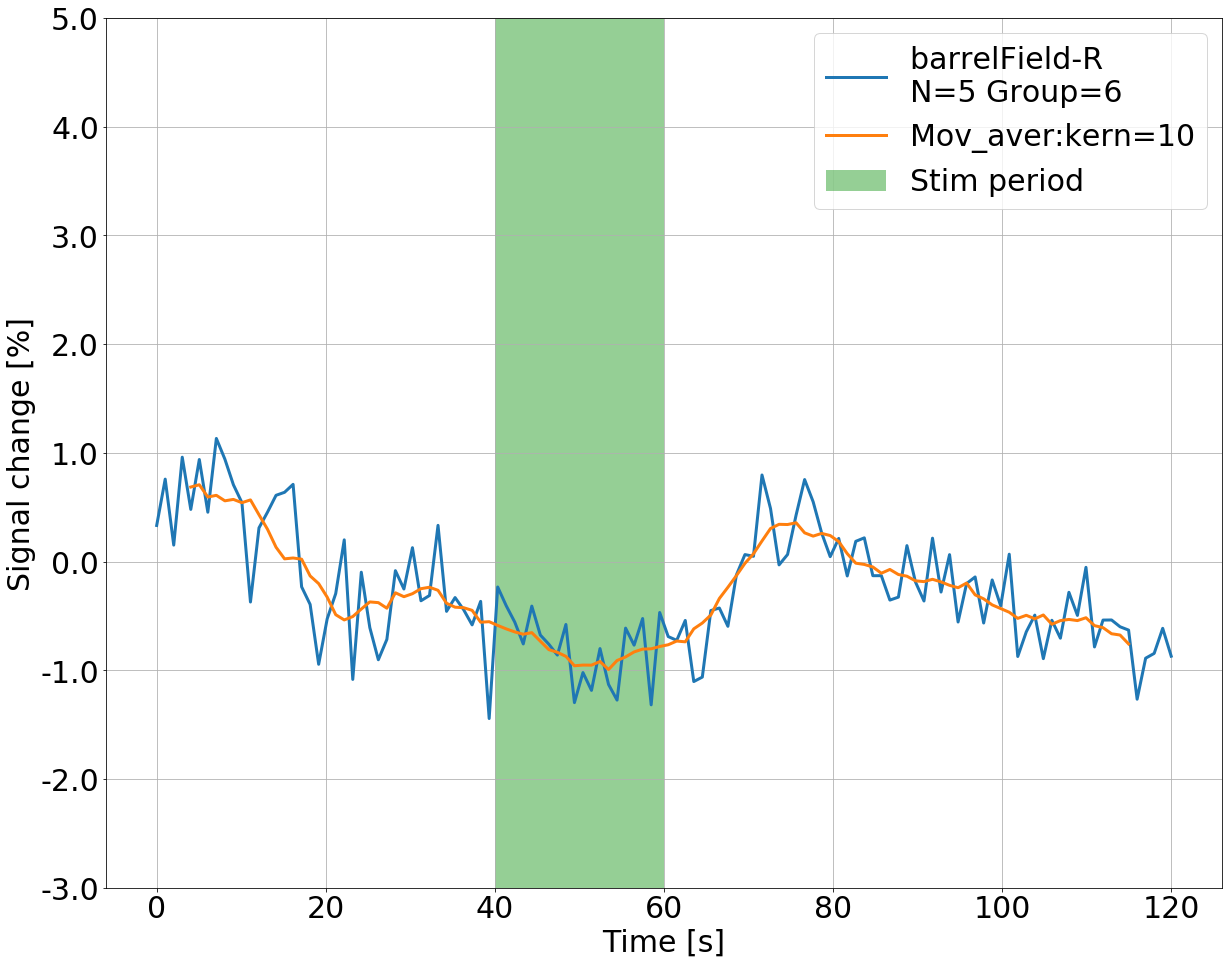

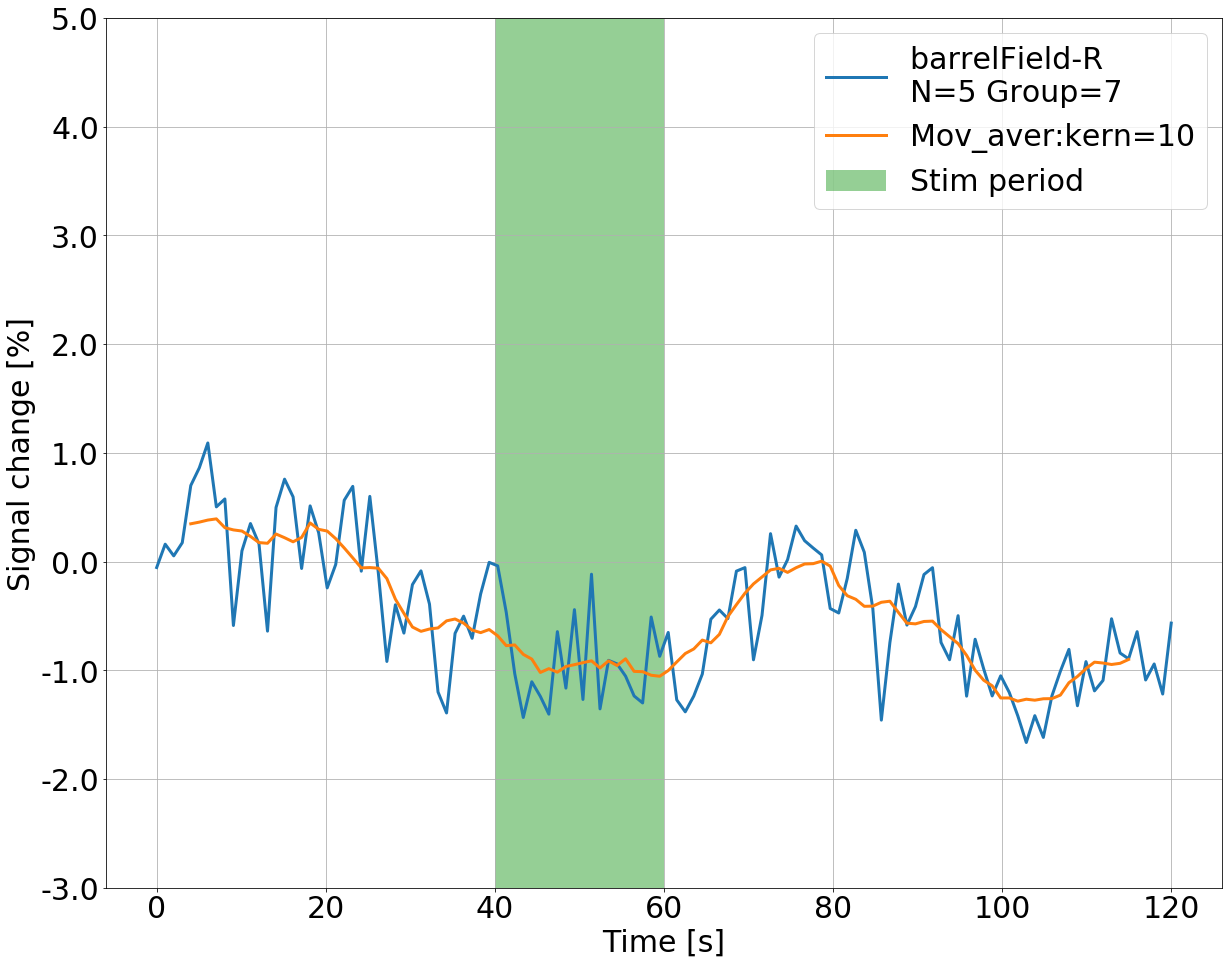

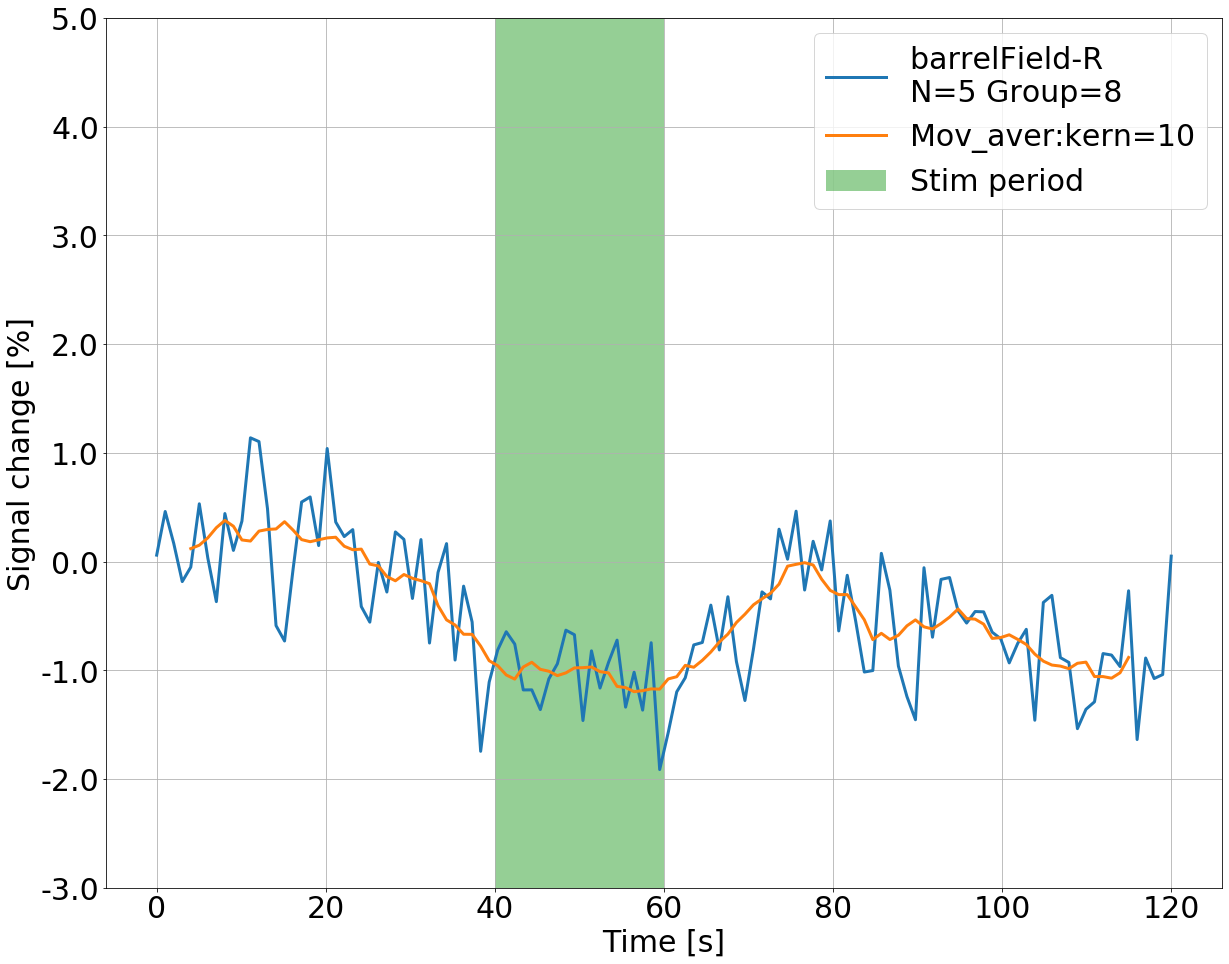

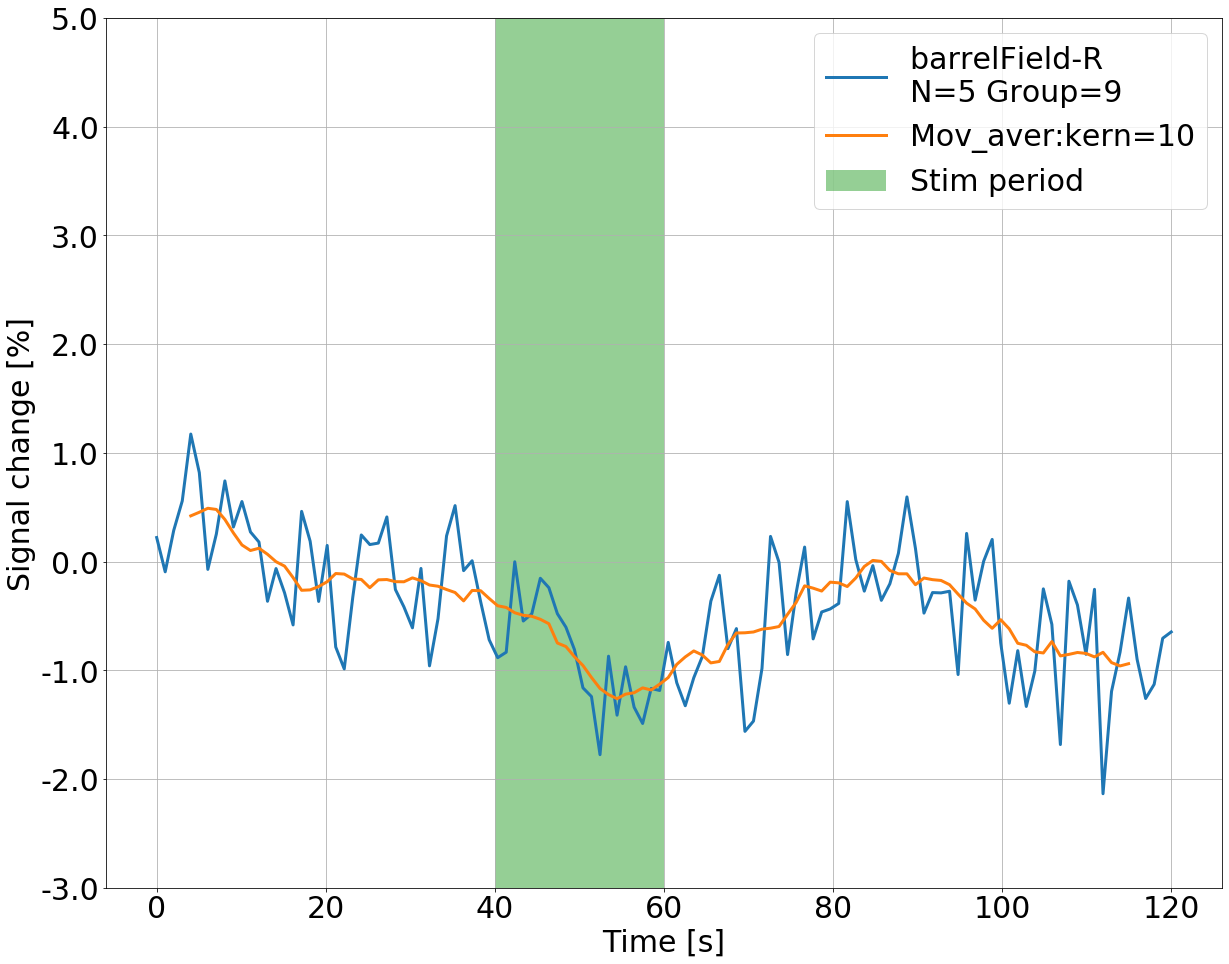

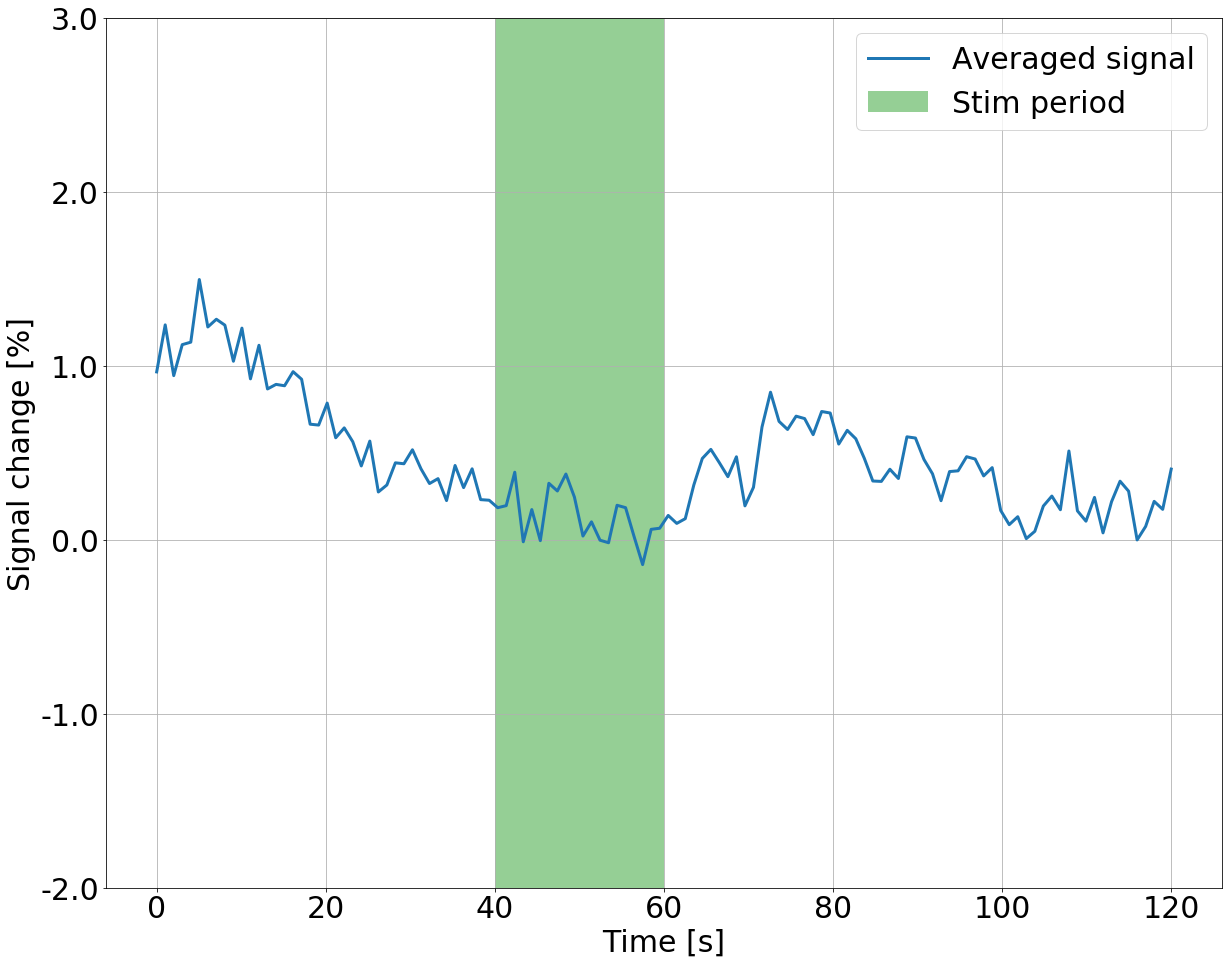

In [23]:
plt.rcParams['figure.figsize'] = [20, 16]
plt.rcParams.update({'font.size': 30})

cnr_group = {}
tsnr_group = {}

for ROI in ROIs:
    cnr_sink = []
    tsnr_sink = []
    
    for group in range(np.shape(blockDict[ROI])[0]):
        
        #Signal averaged withing its group
        averSig = np.mean(blockDict[ROI][group], axis=0)
        
        cnr_sink.append(contrastNoiseRatio(averSig, preStim, onStim))
        tsnr_sink.append(np.mean(averSig[0:preStim])/np.std(averSig[0:preStim]))
        #blockDict['CNR_' + str(group) + '_' + ROI] = cnr
        #print(f'CNR = {cnr}')
        
        y = averSig*100/np.mean(averSig[0:preStim])-100
        
        plt.plot(x_main, y, '-', linewidth=3)
        
        y_mov_aver = np.convolve(y, np.ones((10,))/10, mode='valid')
        fig = plt.plot(x_main[4:115], y_mov_aver, '-', linewidth=3)
        
        plt.axvspan(40, 60, facecolor='#2ca02c', alpha=0.5)
        plt.legend((f'{ROI} \nN={group_by} Group={group+1}',
                    'Mov_aver:kern=10', 'Stim period'), loc='upper right')
        
        ax = plt.gca()
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set_ylim([-3.0, 5.0])
        
        plt.grid()
        plt.xlabel('Time [s]')
        plt.ylabel('Signal change [%]')
        
        if savefigs:
            saveFig(f'Grouped_by_{group_by}_%change_'+f'{ROI}_BL_'
                    +f'mouse-{subject}_'+f'{session}_'+f'Gr_num_{group}'+'.svg')
        plt.show()
    
    cnr_group[ROI] = cnr_sink
    tsnr_group[ROI] = tsnr_sink
    plt.plot(x_main, np.mean(dataDict[ROI], axis=0)*100/np.mean(dataDict[ROI][0:preStim])-100, 
         '-', linewidth=3)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_ylim([-2.0, 3.0])
    plt.axvspan(40, 60, facecolor='#2ca02c', alpha=0.5)
    plt.legend(('Averaged signal', 'Stim period'), loc='upper right')
    plt.grid()
    plt.xlabel('Time [s]')
    plt.ylabel('Signal change [%]')
    
    if savefigs:
            saveFig('Aver_%change_'+f'{ROI}_BL_'+f'mouse-{subject}_'+f'{session}'+'.svg')
    plt.show()

In [24]:
#----------------------------------------------Quality ASURANCE-------------------------------

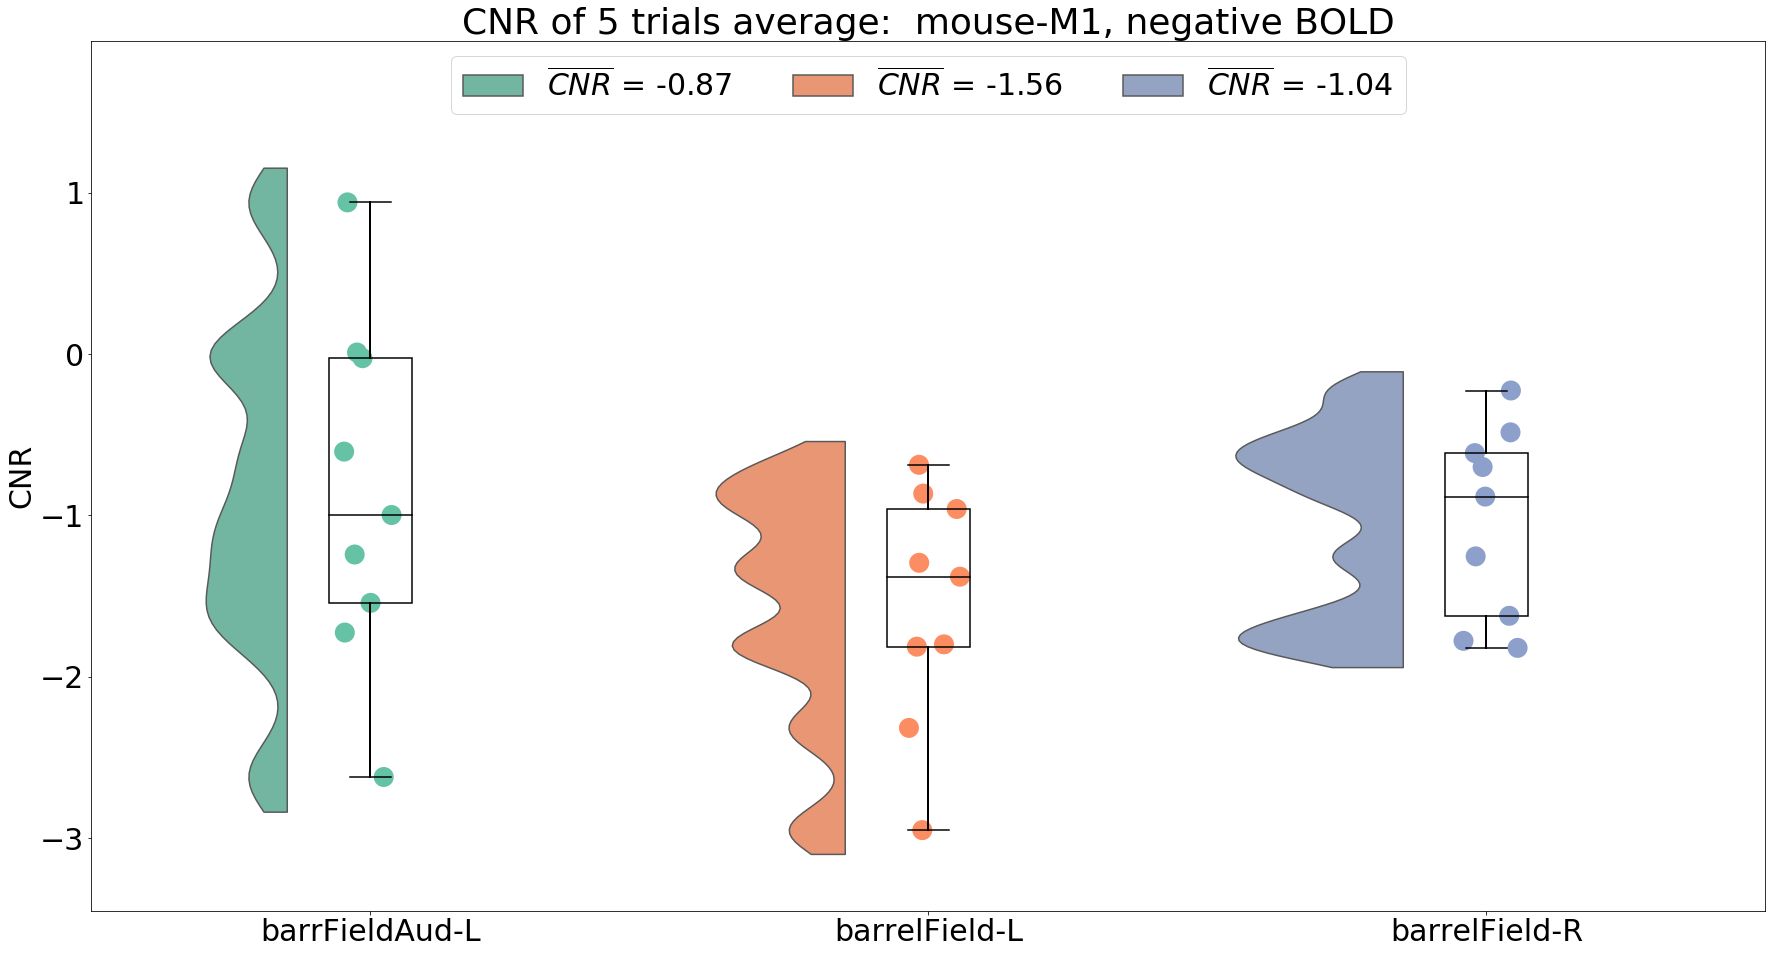

In [25]:
#CNR data for grouped trial and ROI
dataCNR_g = pd.DataFrame.from_dict(cnr_group)

fig, ax = plotHalfViolin(dataCNR_g, 'CNR', str(group_by))

if savefigs:
    saveFig('CNR_grouped_' + f' mouse-{subject}_' + 'NBR' + '.svg')

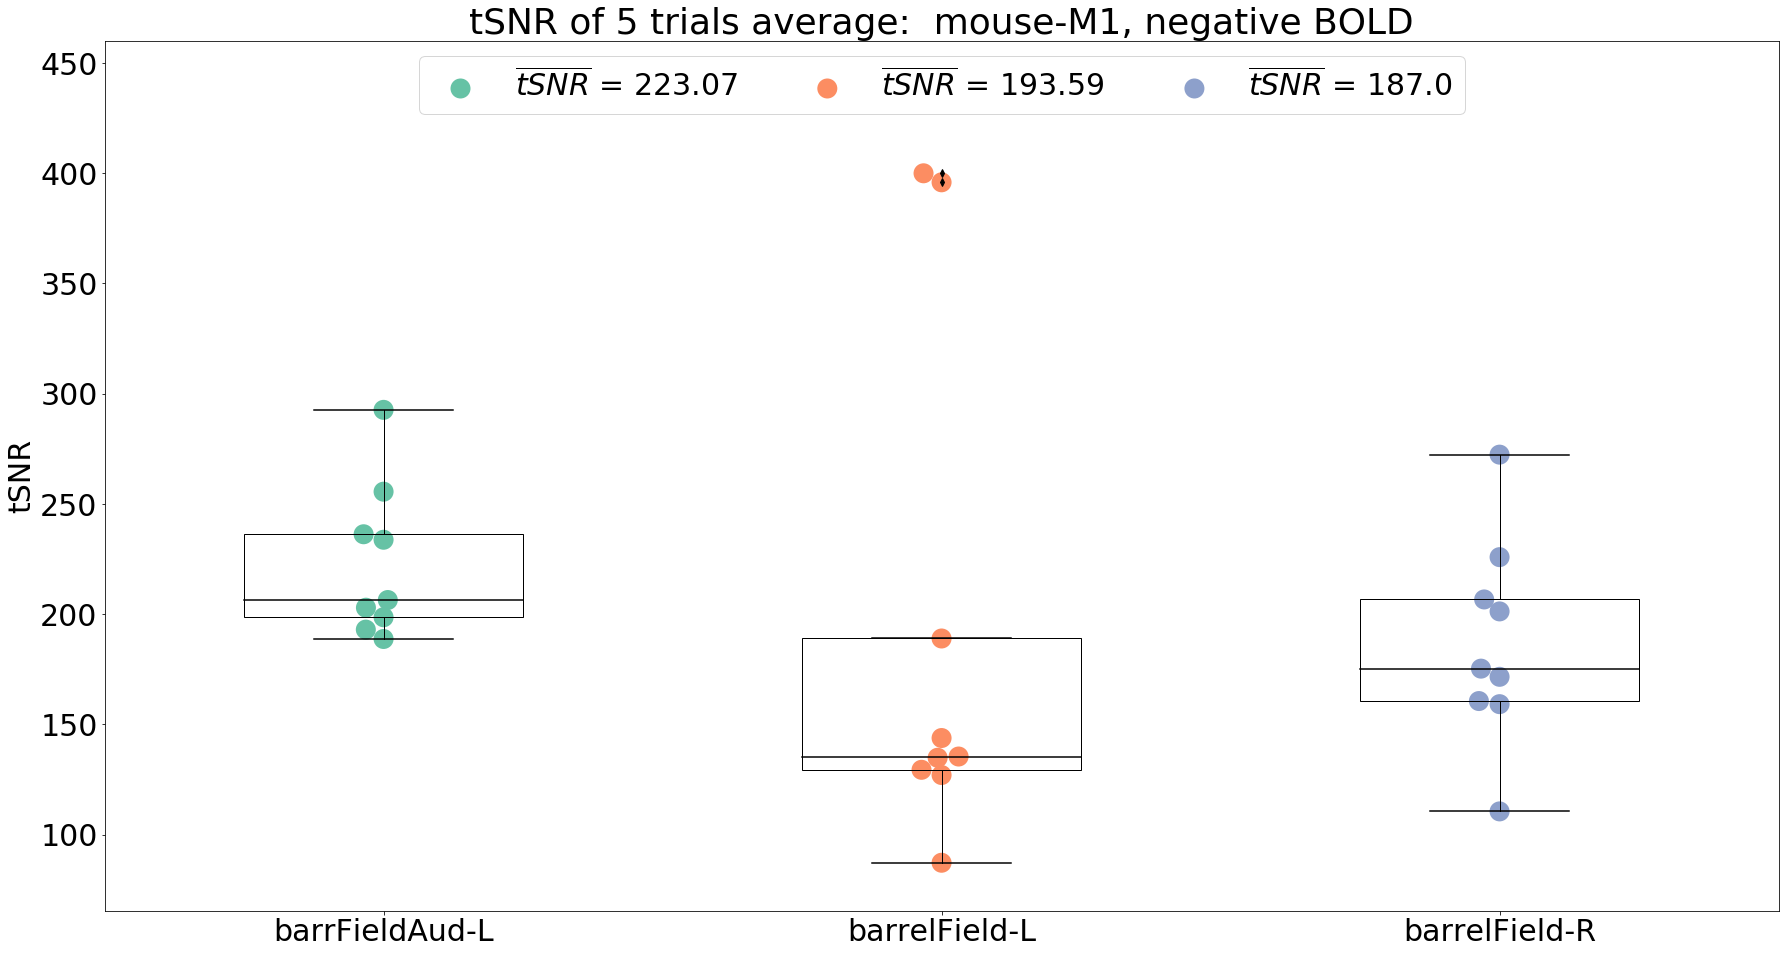

In [26]:
#CNR data for grouped trial and ROI
dataTSNR_g = pd.DataFrame.from_dict(tsnr_group)

fig, ax = plotBar(dataTSNR_g, 'tSNR', str(group_by))

if savefigs:
    saveFig('tSNR_BAR_grouped_' + f' mouse-{subject}_' + 'NBR' + '.svg')